# Import libraries

In [1521]:
import pandas as pd

In [1522]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1523]:
import numpy as np

In [1524]:
import math
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from pandas.api.types import is_numeric_dtype
from sklearn.linear_model import LogisticRegression

# Gather the Data

In [1525]:
data = pd.read_csv("/Users/kb/Ironhack/Labs/Money-Ball-Project/Data/fifa21_male2.csv")

In [1526]:
pd.options.display.max_columns
pd.options.display.max_columns = 200

In [1527]:
pd.options.display.max_rows = 300

In [1528]:
data

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  \
0            Udinese   71  LWB            LM   
1          KAS Eupen   70   CM    CM CAM CDM   
2      Coventry City   71  CAM  CAM RM RW LM   
3         Sunderland   70   ST           NaN   
4        Vissel Kobe   82  CAM        CM CAM   
...              ...  ...  ...           ...   
17120     CD Tondela   66   CB            CB   
17121        Burnley   58  CAM        CAM CM   
17122        Burnley   56   RB            RB   
17123  SK Sturm Graz   62   RB         RB LB   
17124          Lecce   61   ST            ST   

                                            Player Photo  \
0      https://cdn.sofifa.com/players/000/002/16_120.png   
1      https://cdn.sofifa.com/players/000/016/19_120.png   
2      https://cdn.sofifa.com/players/000/027/16_120.png   
3      https://cdn.sofifa.com/players/000/036/09_120.png   
4      https://cdn.sofifa.com/players/000/041/20_120.png   
...                                                  ...   
17120  https://cdn.sofifa.com/players/259/088/20_120.png   
17121  https://cdn.sofifa.com/players/259/090/20_120.png   
17122  https://cdn.sofifa.com/players/259/091/20_120.png   
17123  https://cdn.sofifa.com/players/259/101/20_120.png   
17124  https://cdn.sofifa.com/players/259/105/20_120.png   

                                              Club Logo  \
0          https://cdn.sofifa.com/teams/55/light_60.png   
1        https://cdn.sofifa.com/teams/2013/light_60.png   
2        https://cdn.sofifa.com/teams/1800/light_60.png   
3         https://cdn.sofifa.com/teams/106/light_60.png   
4      https://cdn.sofifa.com/teams/101146/light_60.png   
...                                                 ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png   
17121    https://cdn.sofifa.com/teams/1796/light_60.png   
17122    https://cdn.sofifa.com/teams/1796/light_60.png   
17123     https://cdn.sofifa.com/teams/209/light_60.png   
17124     https://cdn.sofifa.com/teams/347/light_60.png   

                                    Flag Photo  POT  \
0          https://cdn.sofifa.com/flags/it.png   69   
1          https://cdn.sofifa.com/flags/es.png   71   
2      https://cdn.sofifa.com/flags/gb-eng.png   71   
3          https://cdn.sofifa.com/flags/tt.png   82   
4          https://cdn.sofifa.com/flags/es.png   81   
...                                        ...  ...   
17120      https://cdn.sofifa.com/flags/fr.png   69   
17121  https://cdn.sofifa.com/flags/gb-wls.png   66   
17122  https://cdn.sofifa.com/flags/gb-eng.png   67   
17123      https://cdn.sofifa.com/flags/ba.png   73   
17124      https://cdn.sofifa.com/flags/es.png   74   

                       Team & Contract Height  Weight   foot  Growth  \
0                  Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1                KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2            Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3                      Sunderland 2009  5'11"  165lbs  Right      14   
4              Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0   
...                                ...    ...     ...    ...     ...   
17120  CD Tondela Jun 30, 2021 On 

# Data Exploration

In [1529]:
data.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

### Cleaning columns titles

In [1530]:
newcols=[column.lower() for column in data.columns]
data.columns = newcols

### Dropping columns I don't plan on using
#### 'id', 'player photo', 'club logo', 'flag photo', and 'team & contract' have too many unique categorical values for the machine learning algorythm
#### whereas 'gender' is redundent because the dataset is only males

In [1531]:
data = data.drop(['id', 'player photo', 'club logo', 'flag photo', 'team & contract', 'gender'], axis =1)

### Understanding Data Types

#### I notice that weight, height, Value, Wage, Release Clause, w/f, sm, ir, and columns 74 - 101 are all objects when they should probably be numbers

#### I notice that joined and loan date end are objects but are really dates, contract is an object, but I think it would be better to make it a duration of contract column based on the values availible

In [1532]:
data.dtypes

name                 object
age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
position             object
pot                   int64
height               object
weight               object
foot                 object
growth                int64
joined               object
loan date end        object
value                object
wage                 object
release clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions           

### Begin process of cleaning object columns and converting them to numeric

#### Start by converting currency

In [1533]:
def clean_currency(x):
    #returns everything after euro symbol and before the k or m scaler
    n = x[1:len(x)-1]
    if n == '':
        n = 0
    else:
        n=float(n)
    if x[len(x)-1] == "M":
        #descales the value
        return n*1000000
    elif x[len(x)-1] == "K":
        return n*1000
    else:
        return n
    
    

In [1534]:
data['wage'].value_counts()

€2K      2453
€500     1746
€3K      1710
€1K      1293
€4K      1091
€5K       872
€6K       653
€7K       490
€8K       426
€0        423
€9K       381
€10K      283
€15K      268
€11K      246
€12K      242
€13K      228
€20K      213
€14K      193
€16K      154
€17K      151
€18K      147
€900      140
€21K      129
€800      122
€30K      121
€750      114
€850      113
€19K      113
€600      110
€700      109
€650      109
€950      106
€22K       99
€550       93
€25K       92
€26K       90
€24K       87
€23K       84
€27K       71
€40K       67
€28K       64
€29K       63
€50K       59
€35K       53
€34K       50
€31K       48
€36K       47
€37K       46
€32K       44
€33K       42
€45K       40
€38K       39
€41K       38
€42K       37
€48K       33
€60K       33
€44K       31
€46K       29
€39K       29
€43K       27
€47K       27
€49K       24
€80K       23
€70K       21
€53K       20
€55K       20
€51K       19
€59K       17
€54K       16
€57K       16
€105K      16
€100K 

In [1535]:
data['wage']=list(map(clean_currency, data['wage']))


In [1536]:
data['value']=list(map(clean_currency, data['value']))

In [1537]:
data['release clause']=list(map(clean_currency, data['release clause']))

In [1538]:
data.head()

name  age  ova            nationality           club  bov   bp  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position  pot height  weight   foot  growth        joined  \
0            LM   69   6'0"  181lbs   Left       0   Jul 1, 2008   
1    CM CAM CDM   71  5'10"  143lbs  Right       0  Jul 19, 2014   
2  CAM RM RW LM   71   5'9"  161lbs  Right       0   Jan 7, 2016   
3           NaN   82  5'11"  165lbs  Right      14           NaN   
4        CM CAM   81   5'7"  150lbs  Right       0  Jul 16, 2018   

  loan date end      value     wage  release clause     contract  attacking  \
0           NaN   625000.0   7000.0             0.0  2008 ~ 2016        313   
1           NaN   600000.0   7000.0       1100000.0  2014 ~ 2019        337   
2           NaN  1100000.0  15000.0             0.0  2016 ~ 2020        337   
3           NaN        0.0      0.0             0.0         2009        264   
4           NaN  5500000.0  12000.0       7200000.0  2018 ~ 2021        367   

   crossing  finishing  heading accuracy  short passing  volleys  skill  \
0        75         50                59             71     58.0    338   
1        68         64                61             76     68.0    369   
2        80         64                41             77     75.0    387   
3        54         70                60             80      NaN    255   
4        75         69                54             90     79.0    408   

   dribbling  curve  fk accuracy  long passing  ball control  movement  \
0         73   65.0           60            69            71       347   
1         69   79.0           79            71            71       305   
2         79   84.0           77            69            78       295   
3         68    NaN           46            64            77       176   
4         85   80.0           70            83            90       346   

   acceleration  sprint speed  agility  reactions  balance  power  shot power  \
0            68            74     68.0         69     68.0    347          74   
1            56            50     62.0         65     72.0    324          75   
2            48            42     71.0         59     75.0    284          72   
3            59            62      NaN         55      NaN    239          63   
4            61            56     79.0         75     75.0    297          67   

   jumping  stamina  strength  long shots  mentality  aggression  \
0     68.0       69        68          68        320          72   
1     54.0       64        60          71        362          71   
2     58.0       29        56          69        317          69   
3      NaN       51        66          59        271          59   
4     40.0       58        62          70        370          58   

   interceptions  positioning  vision  penalties  composure  defending  \
0           69.0         63.0    66.0         50        NaN        208   
1           71.0         72.0    73.0         75       79.0        153   
2           39.0         69.0    74.0         66        NaN         99   
3           70.0         72.0     NaN         70        NaN         75   
4           70.0         78.0    93.0         71       89.0        181   

   marking  standing tackle  sliding tackle  goalkeeping  gk diving  \
0       70               69            69.0           56         14   
1       70               43            40.0           56          9   
2       35               34            30.0           51          9   
3       34               41             NaN           68          5   
4       68               57            56.0           45          6   

   gk

In [1539]:
data.dtypes

name                 object
age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
position             object
pot                   int64
height               object
weight               object
foot                 object
growth                int64
joined               object
loan date end        object
value               float64
wage                float64
release clause      float64
contract             object
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions           

#### now coverting height

In [1540]:
def clean_height(x):
    f=int(x[:1])*12
    i=int(x[2:len(x)-1])
    return f+i

In [1541]:
data['height']=list(map(clean_height, data['height']))

#### coverting weight using lambda function for simplicity

In [1542]:
data['weight']=list(map(lambda x: float(x[:3]), data['weight']))

#### Converting datas to date format and then extracting the year to reduce number unique categories

In [1543]:
data['joined']=pd.to_datetime(data['joined'])

In [1544]:
data['joined_year'] = pd.DatetimeIndex(data['joined']).year

In [1545]:
data['loan date end']=pd.to_datetime(data['loan date end'])

In [1546]:
data['loan end year']=pd.DatetimeIndex(data['loan date end']).year

In [1547]:
data.tail()

name  age  ova         nationality           club  bov   bp  \
17120       A. Medioub   22   64              France     CD Tondela   66   CB   
17121       W. Rickard   18   56               Wales        Burnley   58  CAM   
17122       C. Barrett   18   56             England        Burnley   56   RB   
17123   J. Gazibegović   20   62  Bosnia Herzegovina  SK Sturm Graz   62   RB   
17124  Pablo Rodríguez   18   59               Spain          Lecce   61   ST   

      position  pot  height  weight   foot  growth     joined loan date end  \
17120       CB   69      78   165.0  Right       5 2020-09-29    2021-06-30   
17121   CAM CM   66      70   170.0  Right      10 2020-08-20           NaT   
17122       RB   67      69   154.0  Right      11 2020-08-20           NaT   
17123    RB LB   73      69   148.0  Right      11 2020-09-30           NaT   
17124       ST   74      70   154.0  Right      15 2020-09-30           NaT   

          value    wage  release clause              contract  attacking  \
17120  550000.0  2000.0             0.0  Jun 30, 2021 On Loan        197   
17121  130000.0  3000.0        273000.0           2020 ~ 2021        248   
17122  130000.0  2000.0        273000.0           2020 ~ 2022        218   
17123  475000.0  3000.0        784000.0           2020 ~ 2023        223   
17124  325000.0  2000.0        788000.0           2020 ~ 2024        254   

       crossing  finishing  heading accuracy  short passing  volleys  skill  \
17120        35         23                66             47     26.0    193   
17121        50         43                50             64     41.0    264   
17122        55         34                53             42     34.0    212   
17123        62         26                52             60     23.0    258   
17124        32         64                59             45     54.0    235   

       dribbling  curve  fk accuracy  long passing  ball control  movement  \
17120         44   26.0           33            34            56       243   
17121         57   42.0           50            61            54       298   
17122         52   43.0           34            36            47       308   
17123         55   43.0           46            57            57       349   
17124         57   45.0           48            30            55       317   

       acceleration  sprint speed  agility  reactions  balance  power  \
17120            52            55     46.0         48     42.0    279   
17121            61            63     52.0         54     68.0    271   
17122            66            61     54.0         59     68.0    233   
17123            72            70     74.0         56     77.0    261   
17124            68            72     59.0         53     65.0    288   

       shot power  jumping  stamina  strength  long shots  mentality  \
17120          48     70.0       59        74          28        218   
17121          51     62.0       53        57          48        259   
17122          28     61.0       53        54          37        256   
17123          51     72.0       57        48          33        257   
17124          58     62.0       55        52          61        224   

       aggression  interceptions  positioning  vision  penalties  composure  \
17120          69           58.0         23.0    29.0         39       46.0   
17121          51           50.0         55.0    53.0         50       46.0   
17122          58           55.0         49.0    45.0         49       43.0   
17123          61           58.0         46.0    56.0         36       54.0   
17124          32           11.0         64.0    50.0         67       57.0   

       defending  marking  standing tackle  sliding tackle  goalkeeping  \
17120        198       61               71            66.0           39   
17121        132       34               42            56.0           57   
17122        163       55               54            54.0           40   
17123   

#### Converting all columns with int + int into seperate int columns
##### starting with left side of the equation
##### iterating throught the columns in the dataset to create new columns containing the value extrated using lambda function

In [1548]:
for column in data.columns[74:101]:
    data[column+"left"]= list(map(lambda x: int(x[:2]), data[column]))
    print(data[column+"left"])

0        65
1        67
2        64
3        67
4        72
         ..
17120    43
17121    53
17122    46
17123    48
17124    59
Name: lsleft, Length: 17125, dtype: int64
0        65
1        67
2        64
3        67
4        72
         ..
17120    43
17121    53
17122    46
17123    48
17124    59
Name: stleft, Length: 17125, dtype: int64
0        65
1        67
2        64
3        67
4        72
         ..
17120    43
17121    53
17122    46
17123    48
17124    59
Name: rsleft, Length: 17125, dtype: int64
0        68
1        67
2        70
3        66
4        79
         ..
17120    41
17121    55
17122    50
17123    55
17124    56
Name: lwleft, Length: 17125, dtype: int64
0        67
1        68
2        69
3        67
4        79
         ..
17120    41
17121    54
17122    47
17123    52
17124    58
Name: lfleft, Length: 17125, dtype: int64
0        67
1        68
2        69
3        67
4        79
         ..
17120    41
17121    54
17122    47
17123    52
17124    5

ValueError: invalid literal for int() with base 10: '9+'

##### now extracting the right side of the columns

In [1549]:
for column in data.columns[74:101]:
    data[column+"rt"]= list(map(lambda x: int(x[3:]), data[column]))
    print(data[column+"rt"])

0        0
1        1
2        0
3        0
4        3
        ..
17120    2
17121    2
17122    2
17123    2
17124    2
Name: lsrt, Length: 17125, dtype: int64
0        0
1        1
2        0
3        0
4        3
        ..
17120    2
17121    2
17122    2
17123    2
17124    2
Name: strt, Length: 17125, dtype: int64
0        0
1        1
2        0
3        0
4        3
        ..
17120    2
17121    2
17122    2
17123    2
17124    2
Name: rsrt, Length: 17125, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
17120    0
17121    0
17122    0
17123    0
17124    0
Name: lwrt, Length: 17125, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
17120    0
17121    0
17122    0
17123    0
17124    0
Name: lfrt, Length: 17125, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
17120    0
17121    0
17122    0
17123    0
17124    0
Name: cfrt, Length: 17125, dtype: int64
0        0
1        0
2        0
3

ValueError: invalid literal for int() with base 10: ''

In [1550]:
data.dtypes

name                        object
age                          int64
ova                          int64
nationality                 object
club                        object
bov                          int64
bp                          object
position                    object
pot                          int64
height                       int64
weight                     float64
foot                        object
growth                       int64
joined              datetime64[ns]
loan date end       datetime64[ns]
value                      float64
wage                       float64
release clause             float64
contract                    object
attacking                    int64
crossing                     int64
finishing                    int64
heading accuracy             int64
short passing                int64
volleys                    float64
skill                        int64
dribbling                    int64
curve                      float64
fk accuracy         

#### now that new columns have been created, we can drop the old object columns

In [1551]:
for column in data.columns[74:101]:
    data = data.drop([column], axis=1)

In [1552]:
data.head()

name  age  ova            nationality           club  bov   bp  \
0  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2      J. Cole   33   71                England  Coventry City   71  CAM   
3     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       position  pot  height  weight   foot  growth     joined loan date end  \
0            LM   69      72   181.0   Left       0 2008-07-01           NaT   
1    CM CAM CDM   71      70   143.0  Right       0 2014-07-19           NaT   
2  CAM RM RW LM   71      69   161.0  Right       0 2016-01-07           NaT   
3           NaN   82      71   165.0  Right      14        NaT           NaT   
4        CM CAM   81      67   150.0  Right       0 2018-07-16           NaT   

       value     wage  release clause     contract  attacking  crossing  \
0   625000.0   7000.0             0.0  2008 ~ 2016        313        75   
1   600000.0   7000.0       1100000.0  2014 ~ 2019        337        68   
2  1100000.0  15000.0             0.0  2016 ~ 2020        337        80   
3        0.0      0.0             0.0         2009        264        54   
4  5500000.0  12000.0       7200000.0  2018 ~ 2021        367        75   

   finishing  heading accuracy  short passing  volleys  skill  dribbling  \
0         50                59             71     58.0    338         73   
1         64                61             76     68.0    369         69   
2         64                41             77     75.0    387         79   
3         70                60             80      NaN    255         68   
4         69                54             90     79.0    408         85   

   curve  fk accuracy  long passing  ball control  movement  acceleration  \
0   65.0           60            69            71       347            68   
1   79.0           79            71            71       305            56   
2   84.0           77            69            78       295            48   
3    NaN           46            64            77       176            59   
4   80.0           70            83            90       346            61   

   sprint speed  agility  reactions  balance  power  shot power  jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   stamina  strength  long shots  mentality  aggression  interceptions  \
0       69        68          68        320          72           69.0   
1       64        60          71        362          71           71.0   
2       29        56          69        317          69           39.0   
3       51        66          59        271          59           70.0   
4       58        62          70        370          58           70.0   

   positioning  vision  penalties  composure  defending  marking  \
0         63.0    66.0         50        NaN        208       70   
1         72.0    73.0         75       79.0        153       70   
2         69.0    74.0         66        NaN         99       35   
3         72.0     NaN         70        NaN         75       34   
4         78.0    93.0         71       89.0        181       68   

   standing tackle  sliding tackle  goalkeeping  gk diving  gk handling  \
0               69            69.0           56         14            5   
1               43            40.0           56          9           12   
2               34            30.0           51          9            6   
3               41             NaN           68          5           21   
4              

#### all columns with star symbols can be made interger by extracting the number without the symbol

In [1553]:
data['w/f']=list(map(lambda x: int(x[:1]),data["w/f"]))

In [1554]:
data['sm']=list(map(lambda x: int(x[:1]),data["sm"]))

In [1555]:
data['ir']=list(map(lambda x: int(x[:1]),data["ir"]))

#### convert contract into contract duration 
##### using regex to extract the first number as a column

In [1556]:
df = pd.DataFrame(data['contract'].str.extract('(\d+)'))
df['start']=data['contract'].str.extract('(\d+)')
df

0 start
0      2008  2008
1      2014  2014
2      2016  2016
3      2009  2009
4      2018  2018
...     ...   ...
17120    30    30
17121  2020  2020
17122  2020  2020
17123  2020  2020
17124  2020  2020

[17125 rows x 2 columns]

In [1557]:
data['contract'].value_counts()

2019 ~ 2021                       1348
2018 ~ 2021                       1077
2019 ~ 2022                       1069
2020 ~ 2022                       1019
2019 ~ 2023                        912
                                  ... 
FC Porto 2019 ~ 2021                 1
FC Luzern Jun 30, 2021 On Loan       1
Junior FC 2019 ~ 2022                1
2012 ~ 2028                          1
1991 ~ 2011                          1
Name: contract, Length: 434, dtype: int64

##### using regex to extract the last number as a column

In [1561]:
df['end']=data['contract'].str.extract('(\d+)(?!.*\d)')
df

0 start   end  length
0      2008  2008  2016     8.0
1      2014  2014  2019     5.0
2      2016  2016  2020     4.0
3      2009  2009  2009     0.0
4      2018  2018  2021     3.0
...     ...   ...   ...     ...
17120    30    30  2021  1991.0
17121  2020  2020  2021     1.0
17122  2020  2020  2022     2.0
17123  2020  2020  2023     3.0
17124  2020  2020  2024     4.0

[17125 rows x 4 columns]

##### used lambda funtion to subtract the two columns to get my length column

In [1562]:
df['length']=list(map(lambda x,y: pd.to_numeric(x,errors='coerce')-pd.to_numeric(y,errors='coerce'), df['end'],df['start']))

In [1563]:
df

0 start   end  length
0      2008  2008  2016     8.0
1      2014  2014  2019     5.0
2      2016  2016  2020     4.0
3      2009  2009  2009     0.0
4      2018  2018  2021     3.0
...     ...   ...   ...     ...
17120    30    30  2021  1991.0
17121  2020  2020  2021     1.0
17122  2020  2020  2022     2.0
17123  2020  2020  2023     3.0
17124  2020  2020  2024     4.0

[17125 rows x 4 columns]

In [1564]:
data['contract_length']=df['length']

#### Drop columns I cleaned

In [1565]:
data = data.drop(['name', 'club', 'nationality', 'joined', 'loan date end','contract','loan end year'], axis=1)

#### convert hits to number

In [1566]:
data['hits']=pd.to_numeric(data['hits'], errors ='coerce')

In [1567]:
data.dtypes

age                   int64
ova                   int64
bov                   int64
bp                   object
position             object
pot                   int64
height                int64
weight              float64
foot                 object
growth                int64
value               float64
wage                float64
release clause      float64
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot power            int64
jumping             float64
stamina               int64
strength            

### Checking categorical columns

In [1568]:
obs=data.select_dtypes(np.object)

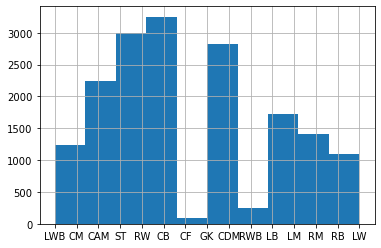

bp


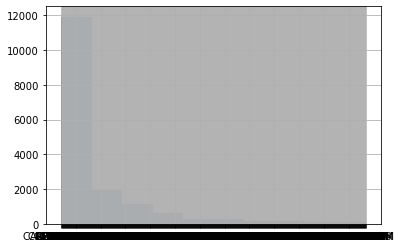

position


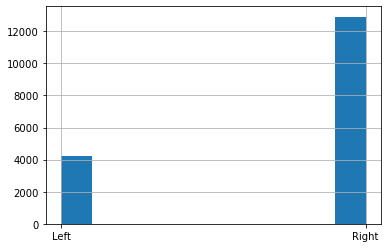

foot


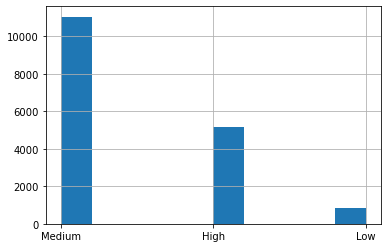

a/w


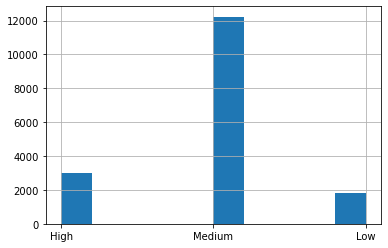

d/w


In [1569]:
for i in obs.columns:
    obs[i].hist()
    plt.show()
    print(i)

In [1570]:
#dropping position bc there are too many unique values
data=data.drop(['position'],axis=1)

#### bp: grouping low frequency bps and calling them other

In [1571]:
df=pd.DataFrame(data['bp'].value_counts().reset_index())
df

index    bp
0     CB  3252
1     ST  2660
2    CAM  2246
3     GK  1576
4     RM  1404
5    CDM  1246
6     CM   990
7     LB   921
8     RB   894
9     LM   805
10    RW   329
11   LWB   252
12   RWB   252
13    LW   209
14    CF    89

In [1572]:
#creating group based on value counts table
group = list(df[df['bp']<400]['index'].values)
group

['RW', 'LWB', 'RWB', 'LW', 'CF']

In [1573]:
def clean_bp(x):
    if x in group:
        return "other"
    else:
        return x

In [1574]:
data['bp']=list(map(clean_bp, data['bp']))

### Cleaning N/As

In [1575]:
x=pd.DataFrame(data.isna().sum()/len(data)*100).reset_index()
x

index         0
0                 age  0.000000
1                 ova  0.000000
2                 bov  0.000000
3                  bp  0.000000
4                 pot  0.000000
5              height  0.000000
6              weight  0.000000
7                foot  0.000000
8              growth  0.000000
9               value  0.000000
10               wage  0.000000
11     release clause  0.000000
12          attacking  0.000000
13           crossing  0.000000
14          finishing  0.000000
15   heading accuracy  0.000000
16      short passing  0.000000
17            volleys  0.338686
18              skill  0.000000
19          dribbling  0.000000
20              curve  0.338686
21        fk accuracy  0.000000
22       long passing  0.000000
23       ball control  0.000000
24           movement  0.000000
25       acceleration  0.000000
26       sprint speed  0.000000
27            agility  0.338686
28          reactions  0.000000
29            balance  0.338686
30              power  0.000000
31         shot power  0.000000
32            jumping  0.338686
33            stamina  0.000000
34           strength  0.000000
35         long shots  0.000000
36          mentality  0.000000
37         aggression  0.000000
38      interceptions  0.040876
39        positioning  0.040876
40             vision  0.338686
41          penalties  0.000000
42          composure  2.470073
43          defending  0.000000
44            marking  0.000000
45    standing tackle  0.000000
46     sliding tackle  0.338686
47        goalkeeping  0.000000
48          gk diving  0.000000
49        gk handling  0.000000
50         gk kicking  0.000000
51     gk positioning  0.000000
52        gk reflexes  0.000000
53        total stats  0.000000
54         base stats  0.000000
55                w/f  0.000000
56                 sm  0.000000
57                a/w  0.519708
58                d/w  0.519708
59                 ir  0.000000
60                pac  0.000000
61                sho  0.000000
62                pas  0.000000
63                dri  0.000000
64                def  0.000000
65                phy  0.000000
66               hits  0.373723
67        joined_year  0.338686
68             lsleft  0.000000
69             stleft  0.000000
70             rsleft  0.000000
71             lwleft  0.000000
72             lfleft  0.000000
73             cfleft  0.000000
74             rfleft  0.000000
75             rwleft  0.000000
76            lamleft  0.000000
77            camleft  0.000000
78            ramleft  0.000000
79             lmleft  0.000000
80            lcmleft  0.000000
81             cmleft  0.000000
82            rcmleft  0.000000
83             rmleft  0.000000
84            lwbleft  0.000000
85            ldmleft  0.000000
86            cdmleft  0.000000
87            rdmleft  0.000000
88            rwbleft  0.000000
89             lbleft  0.000000
90            lcbleft  0.000000
91             cbleft  0.000000
92            rcbleft  0.000000
93             rbleft  0.000000
94               lsrt  0.000000
95               strt  0.000000
96               rsrt  0.000000
97               lwrt  0.000000
98               lfrt  0.000000
99               cfrt  0.000000
100              rfrt  0.000000
101              rwrt  0.000000
102             lamrt  0.000000
103             camrt  0.000000
104             ramrt  0.000000
105              lmrt  0.000000
106             lcmrt  0.000000
107              cmrt  0.000000
108             rcmrt  0.000000
109              rmrt  0.000000
110             lwbrt  0.000000
111             ldmrt  0.000000
112             cdmrt  0.000000
113             rdmrt  0.000000
114             rwbrt  0.000000
115              lbrt  0.000000
116             lcbrt  0.000000
117              cbrt  0.000000
118             rcbrt  0.000000
119              rbrt  0.000000
120   contract_length  1.979562

#### replacing nulls with highest frequency value for categorical values

In [1576]:
data['d/w'].value_counts()

Medium    12225
High       3017
Low        1794
Name: d/w, dtype: int64

In [1577]:
data['d/w']=data['d/w'].fillna('Medium')

#### going to predict a/w so filtering out nulls rather than replacing them

In [1578]:
data['a/w'].value_counts()

Medium    11044
High       5143
Low         849
Name: a/w, dtype: int64

In [1579]:
data[data['a/w'].notnull()].shape


(17036, 121)

In [1580]:
#so dropping about 100 rows
data.shape

(17125, 121)

In [1581]:
data=data[data['a/w'].notnull()]

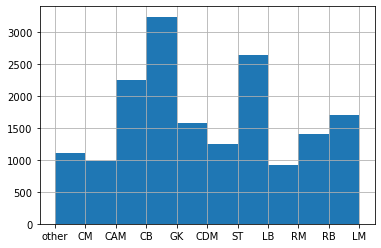

bp


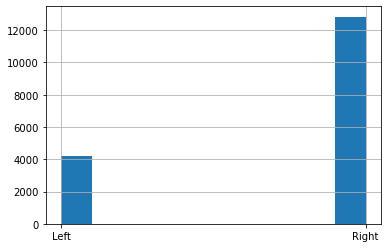

foot


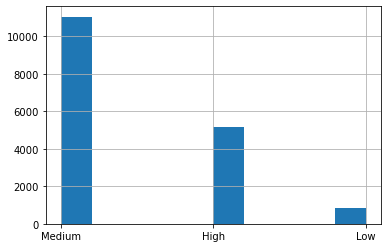

a/w


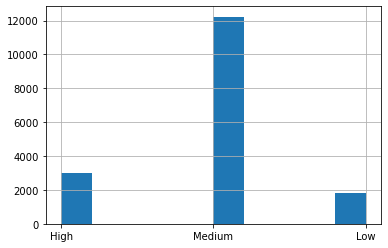

d/w


In [1582]:
obs=data.select_dtypes(np.object)
for i in obs.columns:
    obs[i].hist()
    plt.show()
    print(i)

#### replacing null with mean for numeric values

In [1583]:
x=pd.DataFrame(data.isna().sum()/len(data)*100).reset_index()
x

index         0
0                 age  0.000000
1                 ova  0.000000
2                 bov  0.000000
3                  bp  0.000000
4                 pot  0.000000
5              height  0.000000
6              weight  0.000000
7                foot  0.000000
8              growth  0.000000
9               value  0.000000
10               wage  0.000000
11     release clause  0.000000
12          attacking  0.000000
13           crossing  0.000000
14          finishing  0.000000
15   heading accuracy  0.000000
16      short passing  0.000000
17            volleys  0.000000
18              skill  0.000000
19          dribbling  0.000000
20              curve  0.000000
21        fk accuracy  0.000000
22       long passing  0.000000
23       ball control  0.000000
24           movement  0.000000
25       acceleration  0.000000
26       sprint speed  0.000000
27            agility  0.000000
28          reactions  0.000000
29            balance  0.000000
30              power  0.000000
31         shot power  0.000000
32            jumping  0.000000
33            stamina  0.000000
34           strength  0.000000
35         long shots  0.000000
36          mentality  0.000000
37         aggression  0.000000
38      interceptions  0.000000
39        positioning  0.000000
40             vision  0.000000
41          penalties  0.000000
42          composure  1.960554
43          defending  0.000000
44            marking  0.000000
45    standing tackle  0.000000
46     sliding tackle  0.000000
47        goalkeeping  0.000000
48          gk diving  0.000000
49        gk handling  0.000000
50         gk kicking  0.000000
51     gk positioning  0.000000
52        gk reflexes  0.000000
53        total stats  0.000000
54         base stats  0.000000
55                w/f  0.000000
56                 sm  0.000000
57                a/w  0.000000
58                d/w  0.000000
59                 ir  0.000000
60                pac  0.000000
61                sho  0.000000
62                pas  0.000000
63                dri  0.000000
64                def  0.000000
65                phy  0.000000
66               hits  0.375675
67        joined_year  0.000000
68             lsleft  0.000000
69             stleft  0.000000
70             rsleft  0.000000
71             lwleft  0.000000
72             lfleft  0.000000
73             cfleft  0.000000
74             rfleft  0.000000
75             rwleft  0.000000
76            lamleft  0.000000
77            camleft  0.000000
78            ramleft  0.000000
79             lmleft  0.000000
80            lcmleft  0.000000
81             cmleft  0.000000
82            rcmleft  0.000000
83             rmleft  0.000000
84            lwbleft  0.000000
85            ldmleft  0.000000
86            cdmleft  0.000000
87            rdmleft  0.000000
88            rwbleft  0.000000
89             lbleft  0.000000
90            lcbleft  0.000000
91             cbleft  0.000000
92            rcbleft  0.000000
93             rbleft  0.000000
94               lsrt  0.000000
95               strt  0.000000
96               rsrt  0.000000
97               lwrt  0.000000
98               lfrt  0.000000
99               cfrt  0.000000
100              rfrt  0.000000
101              rwrt  0.000000
102             lamrt  0.000000
103             camrt  0.000000
104             ramrt  0.000000
105              lmrt  0.000000
106             lcmrt  0.000000
107              cmrt  0.000000
108             rcmrt  0.000000
109              rmrt  0.000000
110             lwbrt  0.000000
111             ldmrt  0.000000
112             cdmrt  0.000000
113             rdmrt  0.000000
114             rwbrt  0.000000
115              lbrt  0.000000
116             lcbrt  0.000000
117              cbrt  0.000000
118             rcbrt  0.000000
119              rbrt  0.000000
120   contract_length  1.942944

In [1584]:
num=data.select_dtypes(np.number)

In [1585]:
num.dtypes

age                   int64
ova                   int64
bov                   int64
pot                   int64
height                int64
weight              float64
growth                int64
value               float64
wage                float64
release clause      float64
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot power            int64
jumping             float64
stamina               int64
strength              int64
long shots            int64
mentality             int64
aggression          

#### create group of numeric values with null values

In [1586]:
group = list(x[x[0]>0]['index'].values)
group

['composure', 'hits', 'contract_length']

#### iterate through the group replacing nulls with means

In [1587]:
for i in group:
    if is_numeric_dtype(data[i]):
        data[i]=data[i].fillna(np.mean(data[i]))
        print(i,np.mean(data[i]))
    else:
        print(i)

composure 59.940965153873755
hits 29.114541597925914
contract_length 98.61508530380102


# Dealing with outliers

### Create a loop to determine the upper and lower limits of the dataset

In [1588]:
var_char={}
for i in data.columns:
    if is_numeric_dtype(data[i]):
        iqr = np.percentile(data[i],75)-np.percentile(data[i],25)
        var_char['upperlimit'+str(i)]=np.percentile(data[i],75)+iqr*3
        var_char['lowerlimit'+str(i)]=np.percentile(data[i],25)-iqr*3
        print(i, iqr, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)

age 8.0 53.0 -3.0 (17036, 121)
ova 10.0 102.0 32.0 (17036, 121)
bov 8.0 96.0 40.0 (17036, 121)
pot 7.0 97.0 48.0 (17036, 121)
height 4.0 85.0 57.0 (17036, 121)
weight 22.0 242.0 88.0 (17036, 121)
growth 9.0 36.0 -27.0 (17036, 121)
value 2025000.0 8475000.0 -5700000.0 (17036, 121)
wage 10000.0 41000.0 -29000.0 (17036, 121)
release clause 3377000.0 14031000.0 -9608000.0 (17036, 121)
attacking 74.0 528.0 10.0 (17036, 121)
crossing 24.0 137.0 -31.0 (17036, 121)
finishing 30.25 154.0 -57.75 (17036, 121)
heading accuracy 19.0 122.0 -11.0 (17036, 121)
short passing 13.0 108.0 17.0 (17036, 121)
volleys 27.0 140.0 -49.0 (17036, 121)
skill 87.0 580.0 -29.0 (17036, 121)
dribbling 17.0 121.0 2.0 (17036, 121)
curve 27.0 145.0 -44.0 (17036, 121)
fk accuracy 26.0 136.0 -46.0 (17036, 121)
long passing 20.0 125.0 -15.0 (17036, 121)
ball control 13.0 109.0 18.0 (17036, 121)
movement 66.0 559.0 97.0 (17036, 121)
acceleration 17.0 126.0 7.0 (17036, 121)
sprint speed 16.0 123.0 11.0 (17036, 121)
agility 18

### loop through dataset filtering out rows that are out of bounds

In [1589]:
for i in data.columns:
    if is_numeric_dtype(data[i]):
        if var_char['upperlimit'+str(i)] != var_char['lowerlimit'+str(i)]:
            data=data[(data[i]>var_char['lowerlimit'+str(i)]) & (data[i]<var_char['upperlimit'+str(i)])]
        print(i, iqr, var_char['upperlimit'+str(i)], var_char['lowerlimit'+str(i)], data.shape)

age 3.0 53.0 -3.0 (17035, 121)
ova 3.0 102.0 32.0 (17035, 121)
bov 3.0 96.0 40.0 (17035, 121)
pot 3.0 97.0 48.0 (17031, 121)
height 3.0 85.0 57.0 (17031, 121)
weight 3.0 242.0 88.0 (17029, 121)
growth 3.0 36.0 -27.0 (17029, 121)
value 3.0 8475000.0 -5700000.0 (15732, 121)
wage 3.0 41000.0 -29000.0 (15394, 121)
release clause 3.0 14031000.0 -9608000.0 (15189, 121)
attacking 3.0 528.0 10.0 (15189, 121)
crossing 3.0 137.0 -31.0 (15189, 121)
finishing 3.0 154.0 -57.75 (15189, 121)
heading accuracy 3.0 122.0 -11.0 (15189, 121)
short passing 3.0 108.0 17.0 (15053, 121)
volleys 3.0 140.0 -49.0 (15053, 121)
skill 3.0 580.0 -29.0 (15053, 121)
dribbling 3.0 121.0 2.0 (15053, 121)
curve 3.0 145.0 -44.0 (15053, 121)
fk accuracy 3.0 136.0 -46.0 (15053, 121)
long passing 3.0 125.0 -15.0 (15053, 121)
ball control 3.0 109.0 18.0 (14506, 121)
movement 3.0 559.0 97.0 (14506, 121)
acceleration 3.0 126.0 7.0 (14506, 121)
sprint speed 3.0 123.0 11.0 (14506, 121)
agility 3.0 129.0 3.0 (14506, 121)
reactions

In [1590]:
num=data.select_dtypes(np.number)
obs=data.select_dtypes(np.object)

### loop though numeric values to see shape of your numeric column values

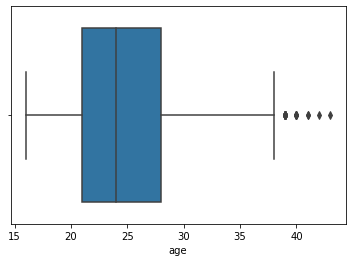

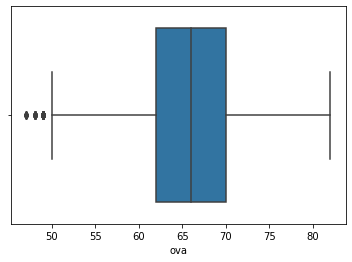

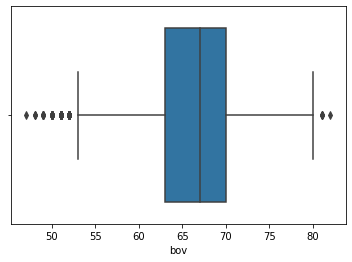

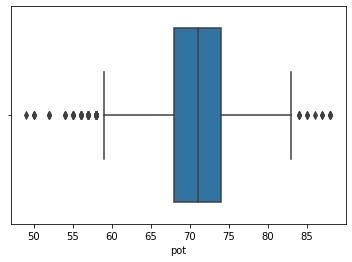

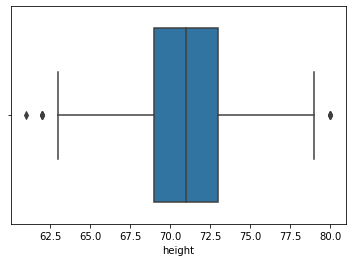

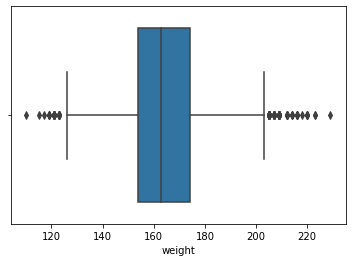

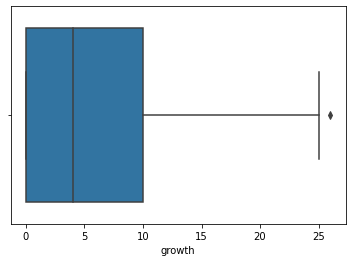

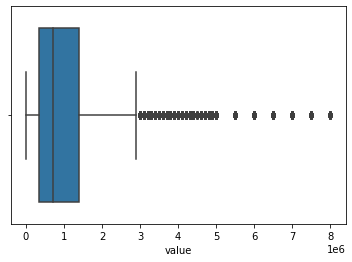

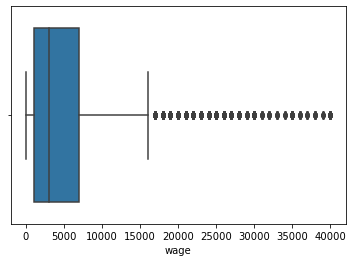

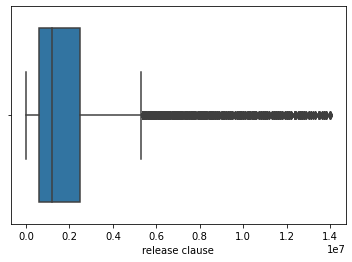

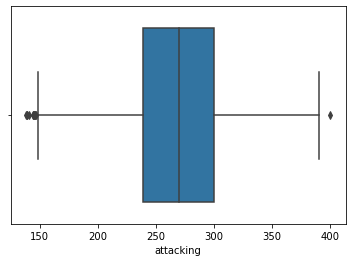

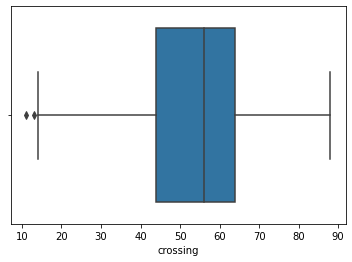

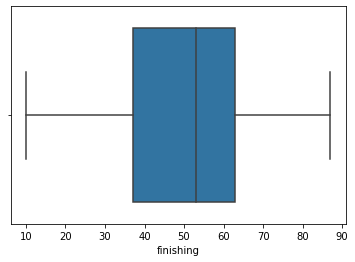

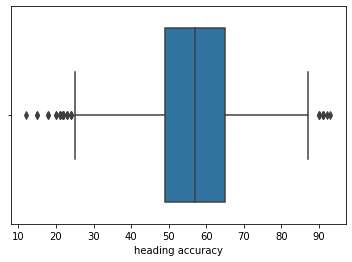

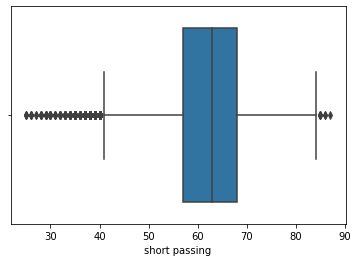

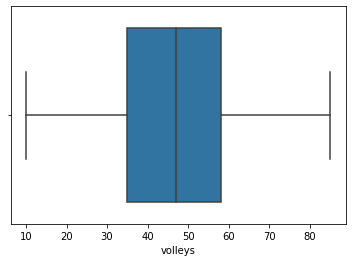

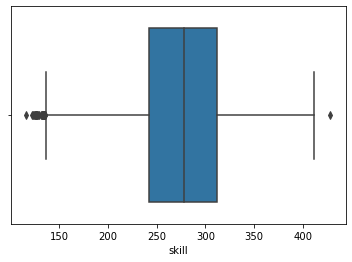

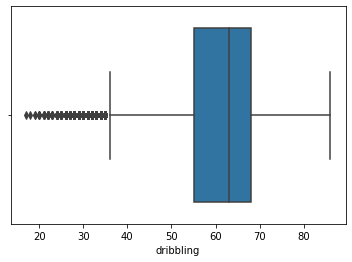

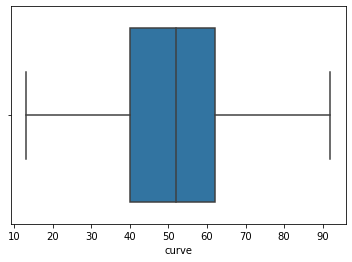

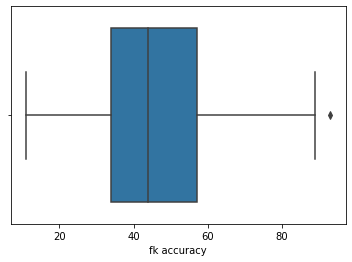

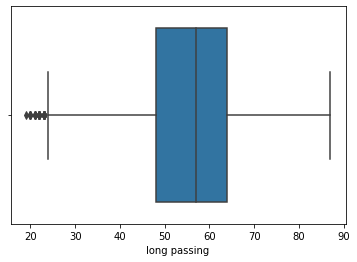

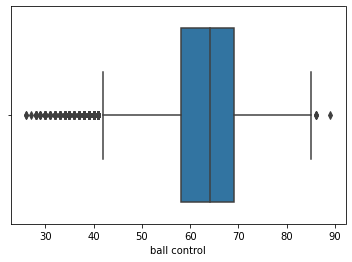

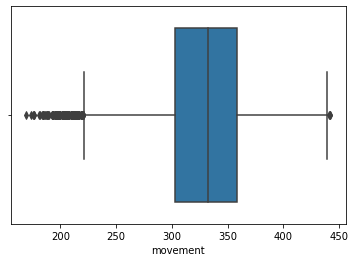

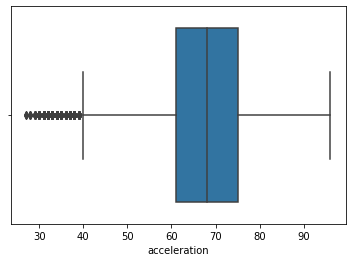

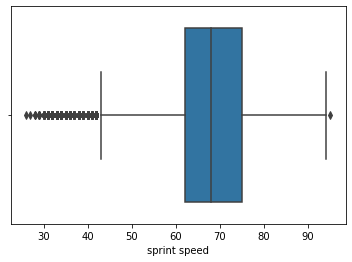

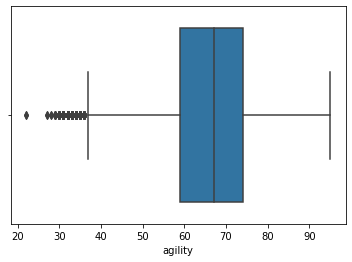

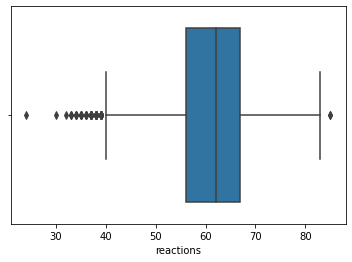

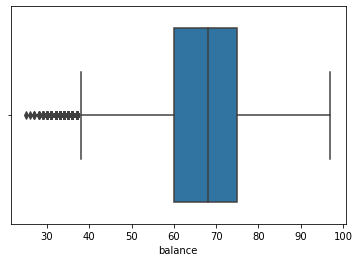

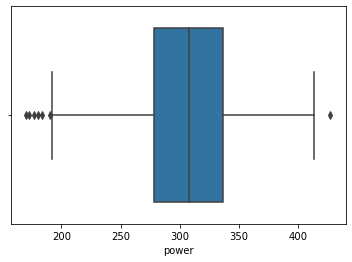

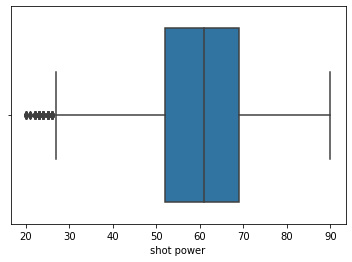

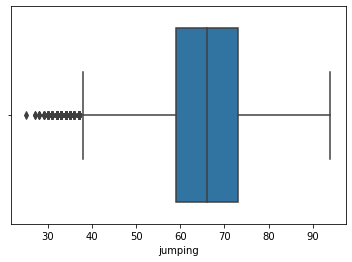

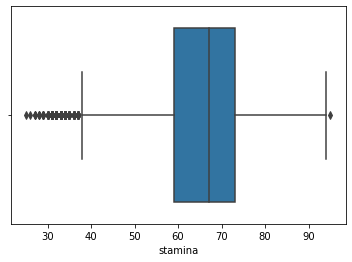

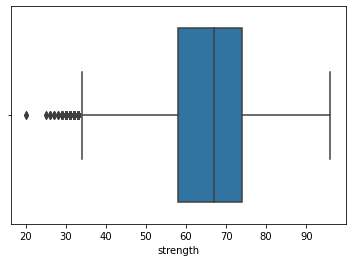

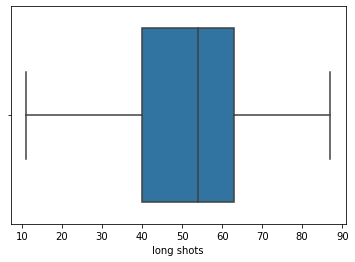

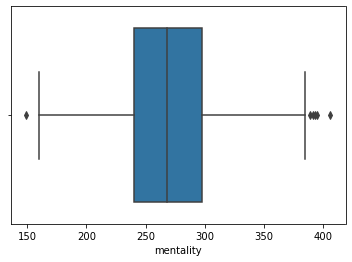

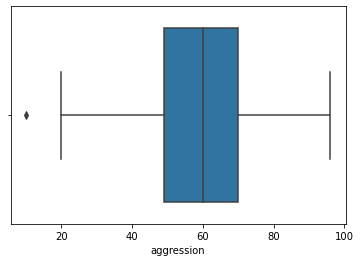

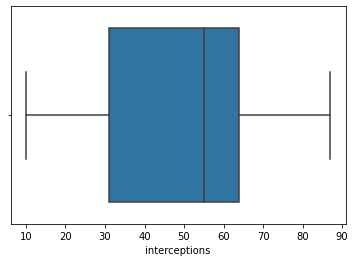

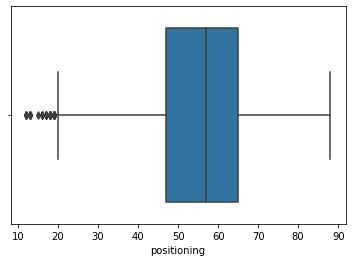

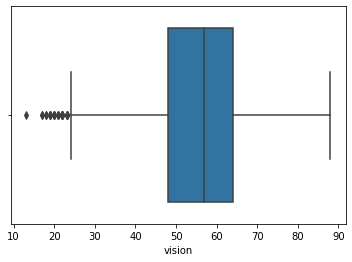

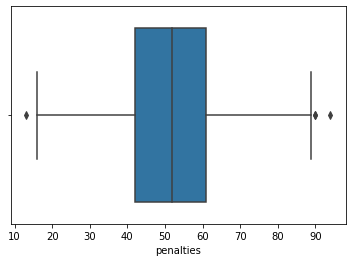

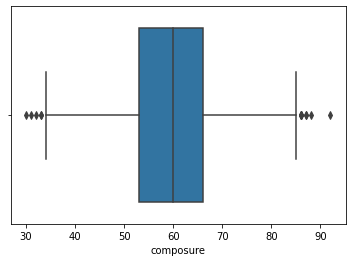

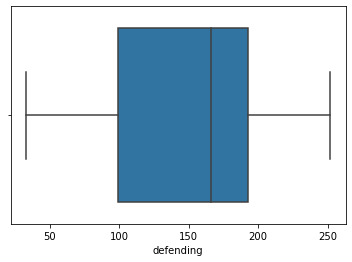

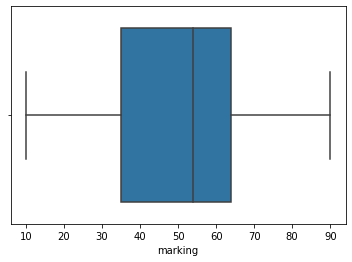

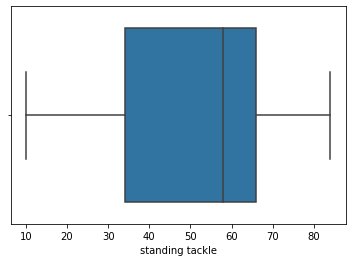

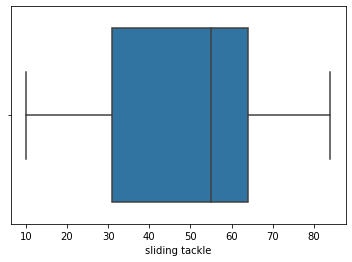

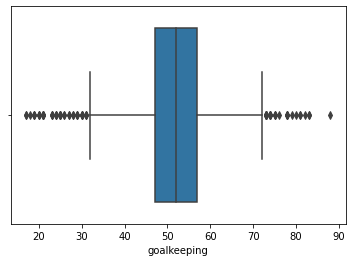

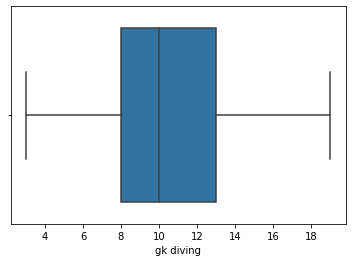

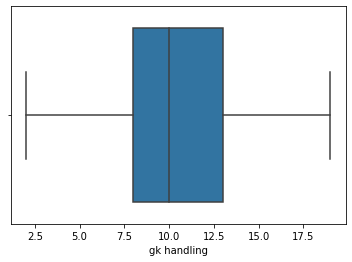

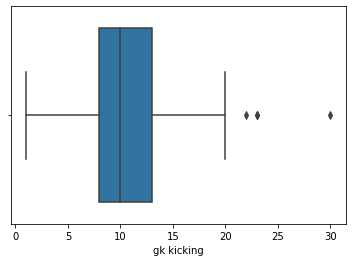

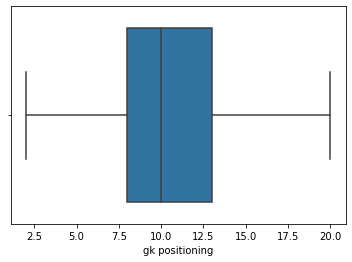

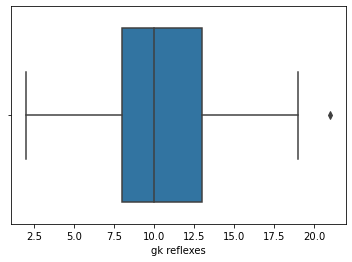

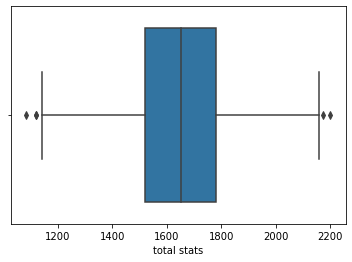

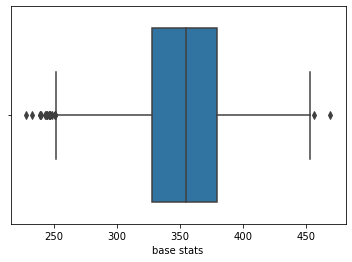

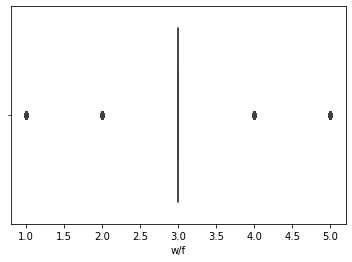

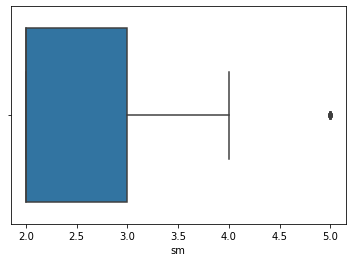

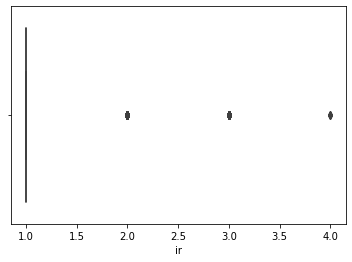

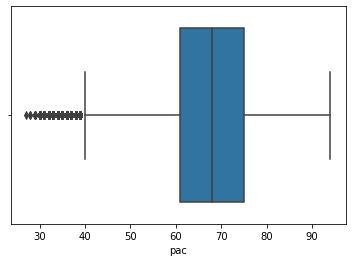

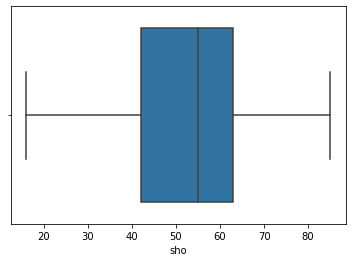

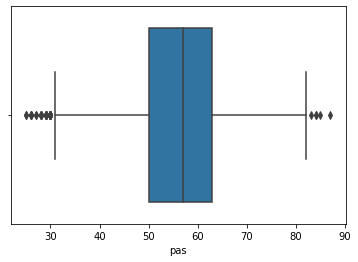

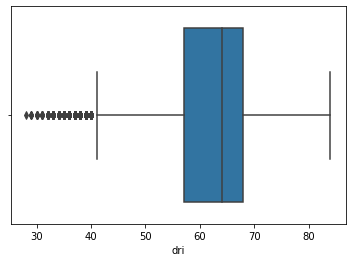

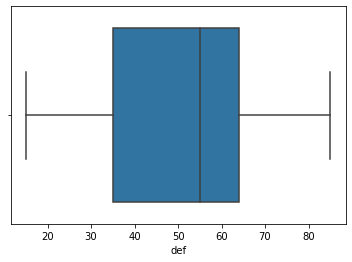

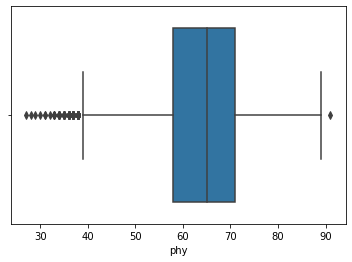

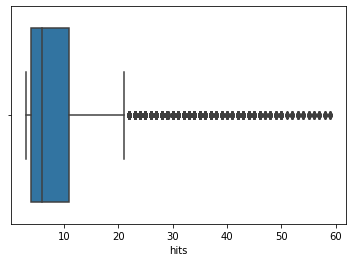

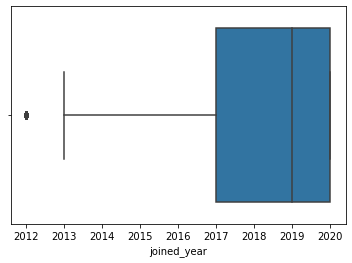

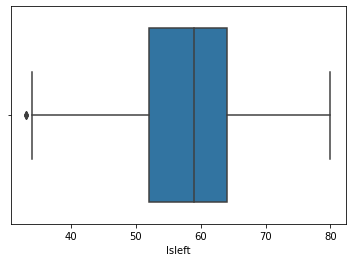

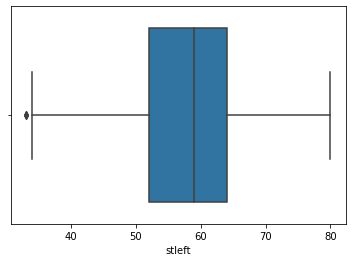

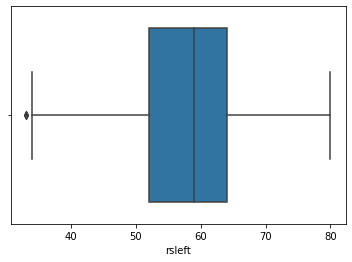

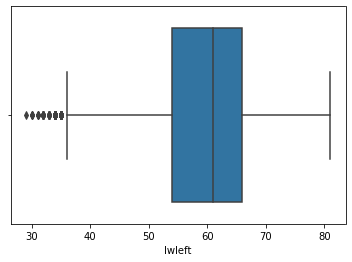

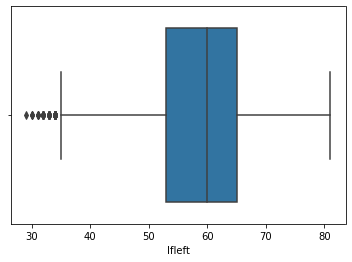

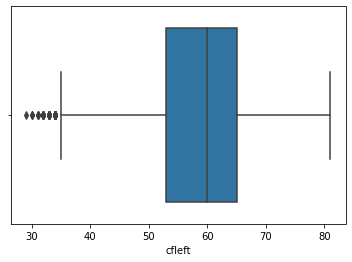

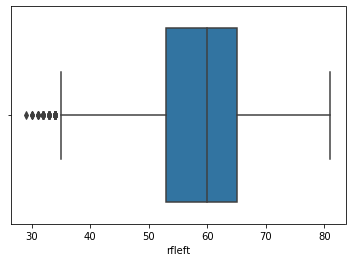

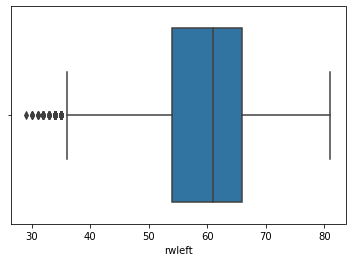

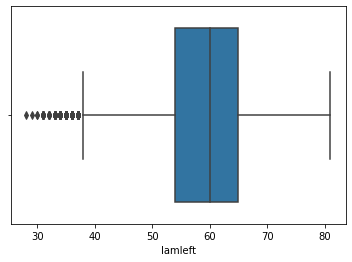

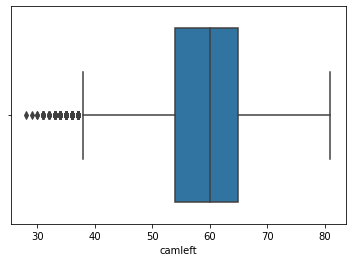

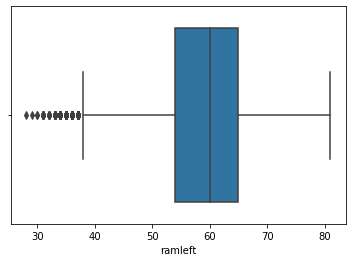

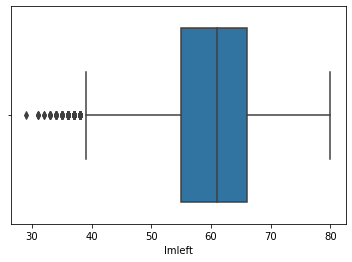

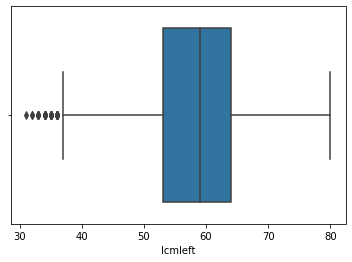

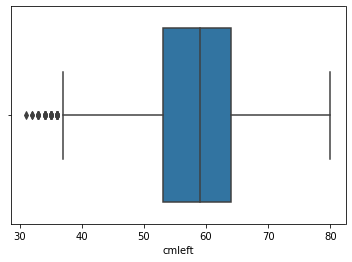

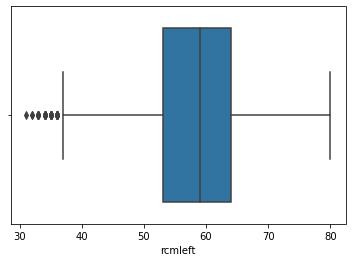

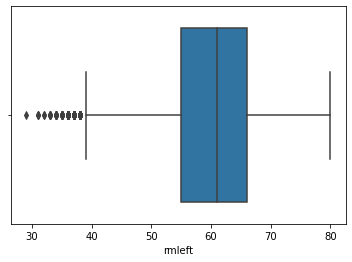

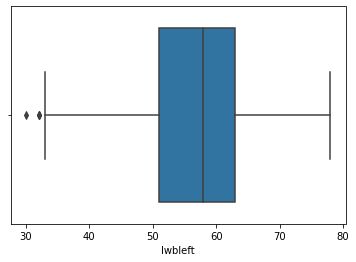

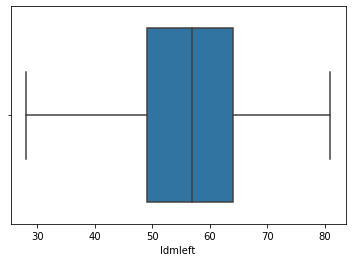

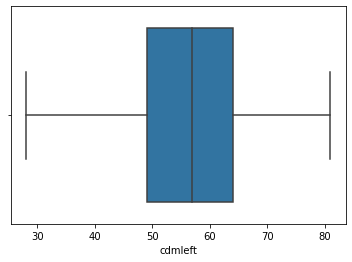

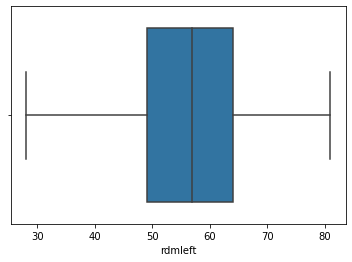

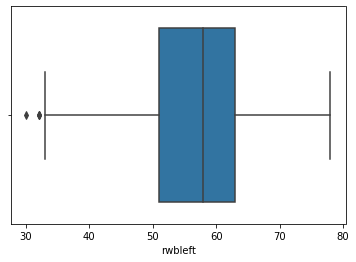

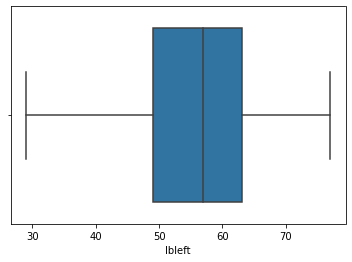

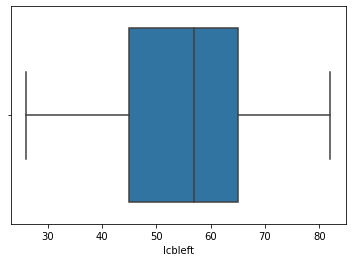

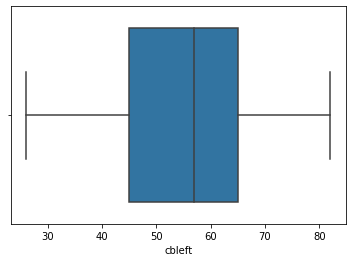

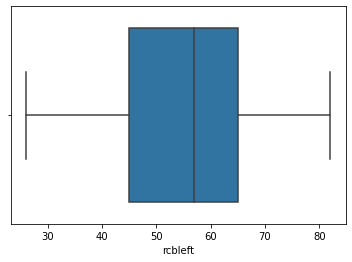

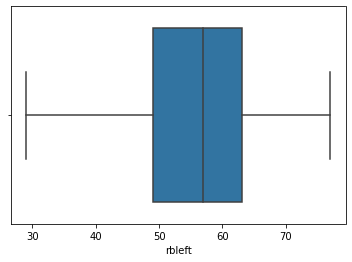

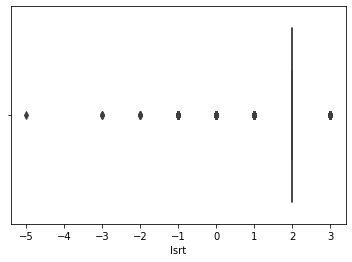

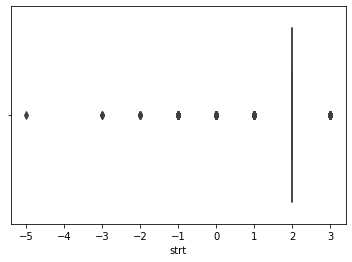

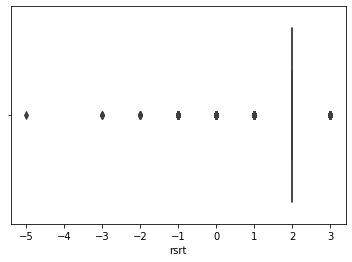

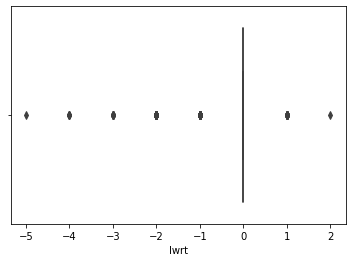

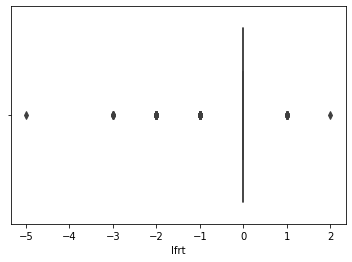

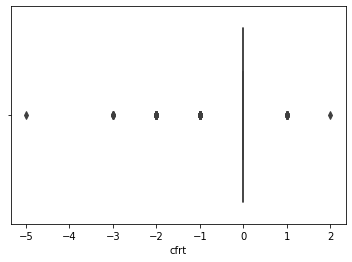

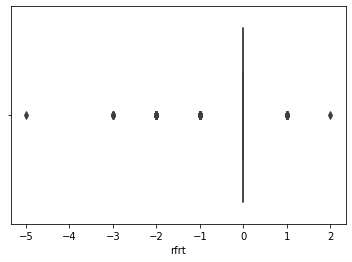

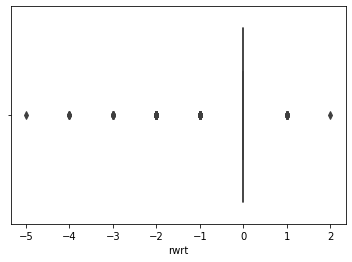

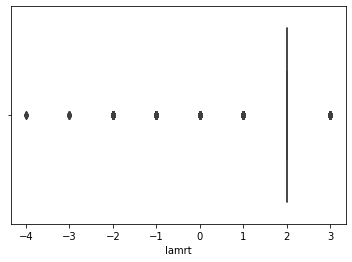

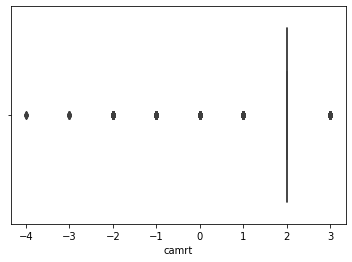

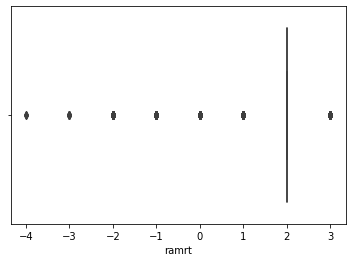

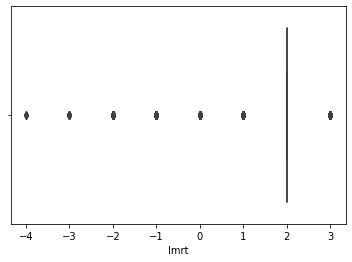

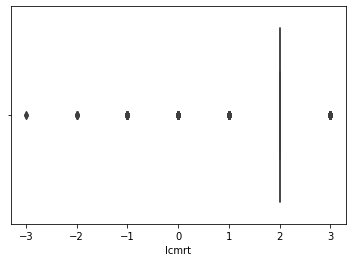

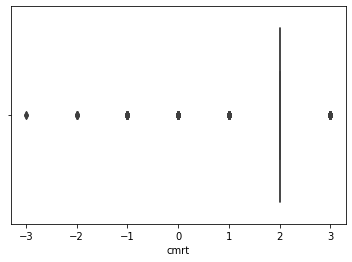

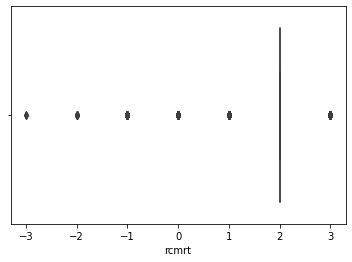

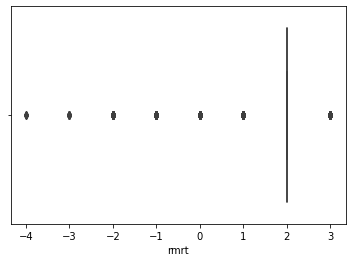

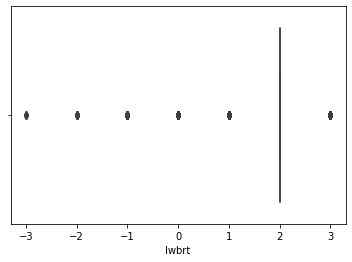

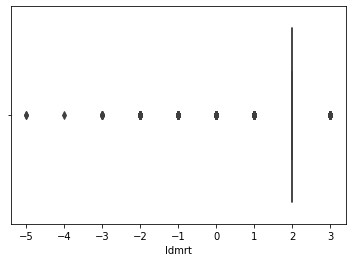

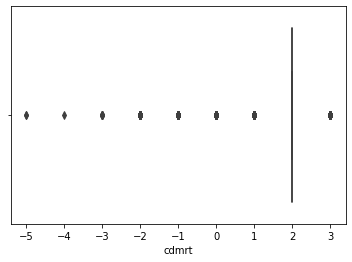

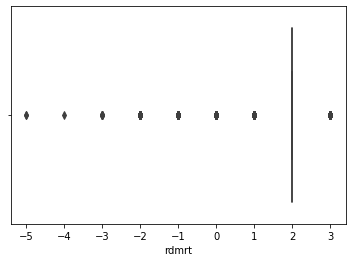

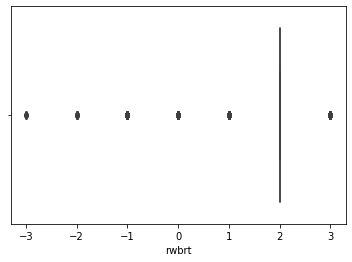

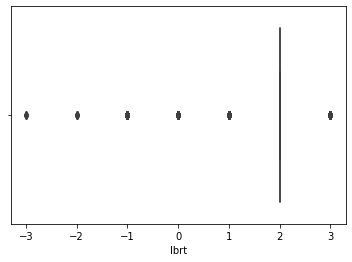

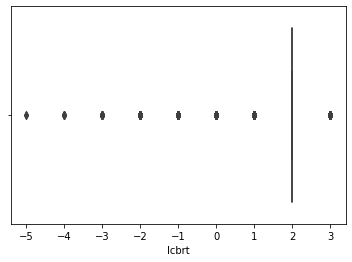

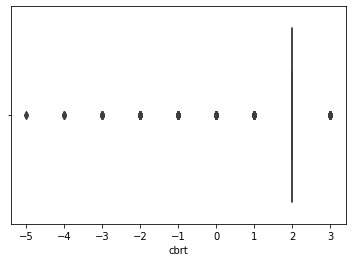

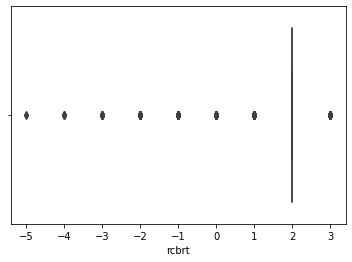

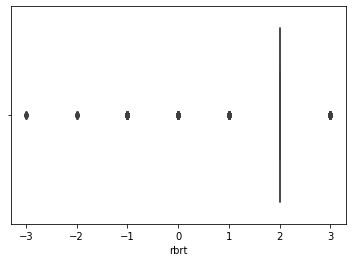

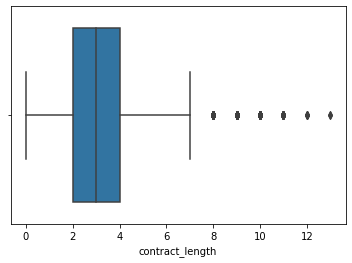

In [1591]:
for i in num.columns:
    sns.boxplot(num[i])
    plt.show()

In [1592]:
#drop y variable from your x's
xnum=num
obs=obs.drop(['a/w'],axis=1)
y=data['a/w']

# Look for multicolinearity
### but not relivant in a logrthmic regression

In [1593]:
cormatrix=xnum.corr()

<AxesSubplot:>

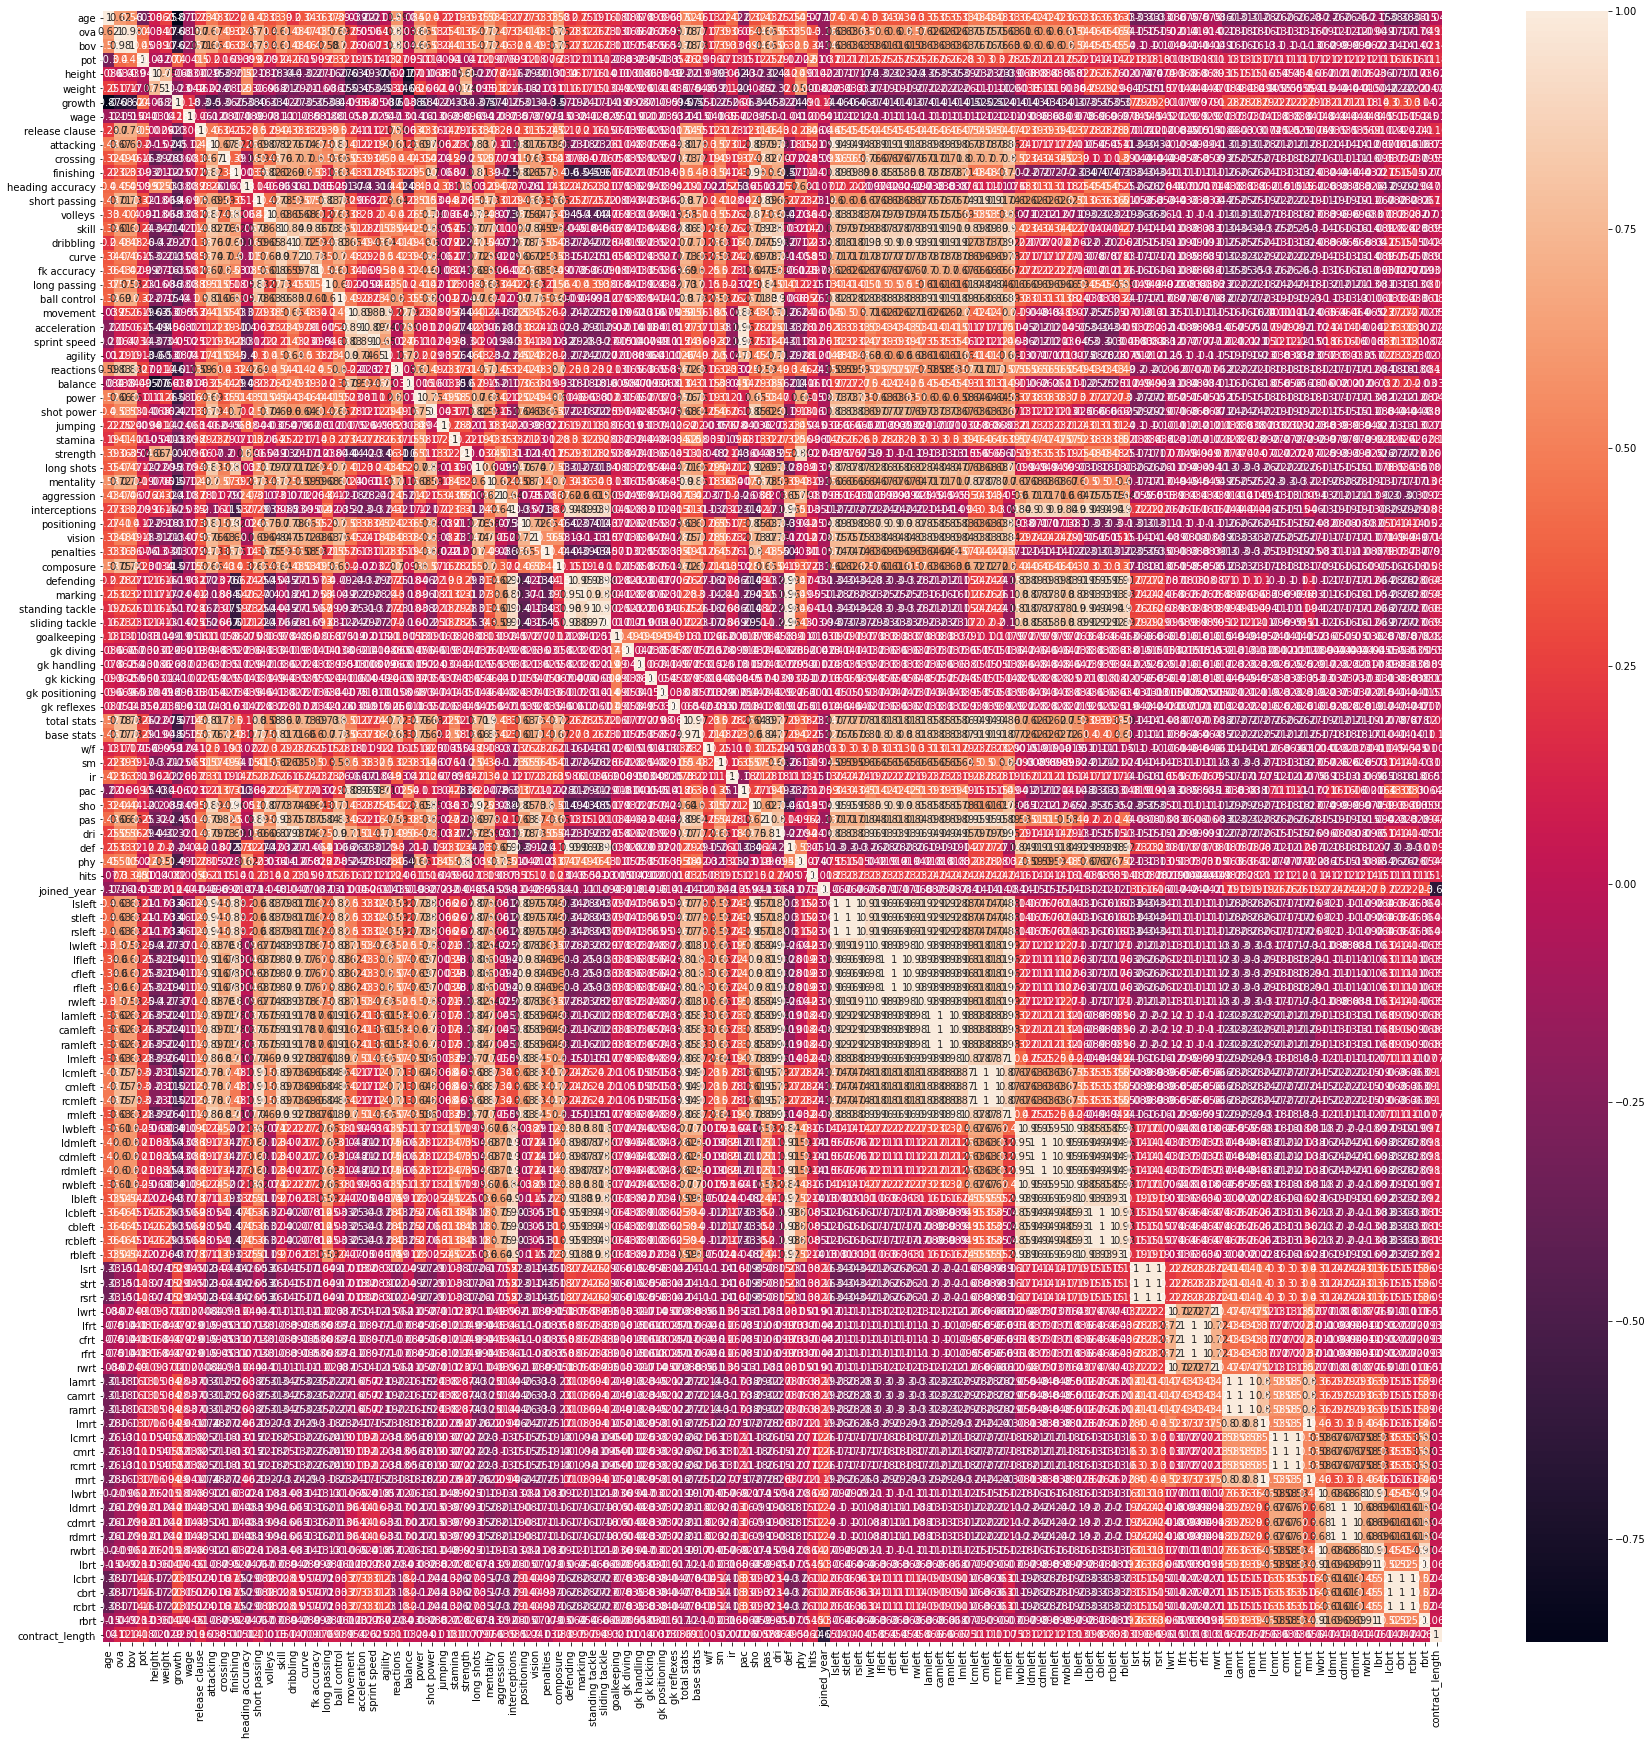

In [989]:
#fig, ax = plt.subplots(figsize=(30,30))  
#sns.heatmap(cormatrix, annot=True, ax=ax)

In [1594]:
xnum.corr()

age       ova       bov       pot    height    weight  \
age               1.000000  0.617042  0.550703 -0.324908  0.083558  0.244899   
ova               0.617042  1.000000  0.979589  0.388176  0.029539  0.170426   
bov               0.550703  0.979589  1.000000  0.435888  0.034048  0.165460   
pot              -0.324908  0.388176  0.435888  1.000000 -0.046116 -0.076640   
height            0.083558  0.029539  0.034048 -0.046116  1.000000  0.752449   
weight            0.244899  0.170426  0.165460 -0.076640  0.752449  1.000000   
growth           -0.868494 -0.677020 -0.618772  0.415452 -0.065983 -0.229416   
value             0.271765  0.743963  0.746797  0.482732 -0.010861  0.067855   
wage              0.385005  0.634007  0.623704  0.298061  0.054412  0.118828   
release clause    0.221465  0.707168  0.714450  0.506318 -0.008215  0.057312   
attacking         0.468613  0.662110  0.659720  0.191498 -0.156508 -0.026017   
crossing          0.309656  0.486605  0.458822  0.152371 -0.393697 -0.278315   
finishing         0.213844  0.321951  0.331727  0.086448 -0.213299 -0.117307   
heading accuracy  0.393317  0.447517  0.443132  0.087993  0.521869  0.531281   
short passing     0.417927  0.706980  0.725072  0.308134 -0.178894 -0.071596   
volleys           0.319288  0.398484  0.398880  0.081345 -0.177593 -0.070444   
skill             0.387126  0.604709  0.605987  0.226255 -0.341896 -0.218345   
dribbling         0.193880  0.475997  0.479697  0.257902 -0.398688 -0.294947   
curve             0.333331  0.461364  0.451971  0.138836 -0.319418 -0.209965   
fk accuracy       0.354189  0.425029  0.418197  0.089376 -0.275701 -0.167288   
long passing      0.364543  0.563277  0.578790  0.222283 -0.166271 -0.088103   
ball control      0.377752  0.686836  0.695359  0.310352 -0.272476 -0.151523   
movement         -0.040377  0.251125  0.258526  0.193372 -0.625826 -0.531782   
acceleration     -0.220621  0.054697  0.063686  0.151842 -0.487109 -0.451734   
sprint speed     -0.213286  0.067442  0.075809  0.145817 -0.365135 -0.341925   
agility          -0.012606  0.189819  0.194340  0.125942 -0.603334 -0.524768   
reactions         0.579662  0.826120  0.823628  0.258635  0.016578  0.141476   
balance          -0.083829  0.039648  0.045896  0.097331 -0.773379 -0.660180   
power             0.512827  0.661052  0.662252  0.096701  0.113588  0.264141   
shot power        0.396865  0.522305  0.527635  0.131713 -0.070184  0.059702   
jumping           0.219222  0.245633  0.241830  0.005212  0.081276  0.138852   
stamina           0.193528  0.415017  0.420079  0.098680 -0.053388 -0.000072   
strength          0.390264  0.355492  0.347123 -0.054687  0.654634  0.737120   
long shots        0.343722  0.461613  0.466361  0.105682 -0.221181 -0.096689   
mentality         0.569625  0.718825  0.710291  0.179883 -0.079443  0.048515   
aggression        0.425756  0.467036  0.455051  0.068794  0.241976  0.313467   
interceptions     0.264655  0.324726  0.317170  0.092965  0.155955  0.159981   
positioning       0.269587  0.405589  0.400553  0.112080 -0.293986 -0.182769   
vision            0.318061  0.476890  0.487772  0.170814 -0.313860 -0.215415   
penalties         0.323037  0.354990  0.347824  0.063982 -0.135434 -0.033707   
composure         0.572614  0.754084  0.748270  0.221650 -0.006243  0.106302   
defending         0.198866  0.277015  0.272755  0.112316  0.161799  0.154449   
marking           0.249177  0.324506  0.319679  0.106824  0.169294  0.172569   
standing tackle   0.183864  0.259987  0.256432  0.109135  0.163083  0.153183   
sliding tackle    0.151588  0.228258  0.224150  0.111798  0.140859  0.126775   
goalkeeping       0.183802  0.128676  0.113502 -0.085663  0.013339  0.051666   
gk diving         0.086769  0.065955  0.056156 -0.033171  0.003978  0.028632   
gk handling       0.078826  0.060562  0.052035 -0.034013  0.008895  0.027294   
gk kicking        0.096964  0.065111  0.058258 -0.052250  0.004468  0.016199   
gk positioning    0.097

In [1045]:
#corrtable=data[['lsleft','stleft','rsleft','lwleft','lfleft','cfleft','rfleft','rwleft','lamleft','camleft','ramleft','lmleft','lcmleft','cmleft','rcmleft','rmleft','wage']]
#corry=corrtable.corr()
#sns.heatmap(corry, annot=True)

In [1046]:
#xnum=xnum.drop(['stleft','rsleft','lwleft','lfleft','cfleft','rfleft','rwleft','lamleft','camleft','ramleft','lmleft','lcmleft','cmleft','rcmleft','rmleft'],axis=1)
                
                

In [1047]:
#corrmatrix=xnum.corr()

In [1048]:
#fig, ax = plt.subplots(figsize=(30,30))  
#sns.heatmap(corrmatrix, annot=True, ax=ax)


In [1049]:
#corrtable2=data[['defending','marking','standing tackle','sliding tackle','lsleft','lwbleft','ldmleft','cdmleft','rdmleft','rwbleft','lbleft','lcbleft','cbleft','rcbleft','rbleft','wage']]

In [1050]:
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=corrtable.corr()
#sns.heatmap(corry, annot=True)

In [1051]:
#xnum=xnum.drop(['defending','marking','standing tackle','sliding tackle','lwbleft','ldmleft','cdmleft','rdmleft','rwbleft','lbleft','lcbleft','cbleft','rcbleft','rbleft'],axis=1)


In [1052]:
#corrmatrix=xnum.corr()
#fig, ax = plt.subplots(figsize=(30,30))  
#sns.heatmap(corrmatrix, annot=True, ax=ax)

In [1053]:
#corrtable2=data[['lsleft','stleft','rsleft','lwleft','lfleft','cfleft','rfleft','rwleft','lamleft','camleft','ramleft','lmleft','lcmleft','cmleft','rcmleft','rmleft','wage']]
#corry=corrtable.corr()
#sns.heatmap(corry, annot=True)


In [1595]:
xnum.head()

age  ova  bov  pot  height  weight  growth      value     wage  \
1    37   71   70   71      70   143.0       0   600000.0   7000.0   
2    33   71   71   71      69   161.0       0  1100000.0  15000.0   
23   38   70   74   70      69   163.0       0   190000.0  30000.0   
24   37   73   72   73      74   174.0       0        0.0   6000.0   
44   37   66   66   66      73   205.0       0    80000.0   4000.0   

    release clause  attacking  crossing  finishing  heading accuracy  \
1        1100000.0        337        68         64                61   
2              0.0        337        80         64                41   
23             0.0        343        70         80                50   
24             0.0        231        36         22                71   
44             0.0        318        55         63                71   

    short passing  volleys  skill  dribbling  curve  fk accuracy  \
1              76     68.0    369         69   79.0           79   
2              77     75.0    387         79   84.0           77   
23             71     72.0    376         72   77.0           81   
24             65     37.0    257         54   46.0           25   
44             69     60.0    265         63   61.0           26   

    long passing  ball control  movement  acceleration  sprint speed  agility  \
1             71            71       305            56            50     62.0   
2             69            78       295            48            42     71.0   
23            64            82       243            27            31     42.0   
24            62            70       243            50            34     38.0   
44            43            72       245            42            45     50.0   

    reactions  balance  power  shot power  jumping  stamina  strength  \
1          65     72.0    324          75     54.0       64        60   
2          59     75.0    284          72     58.0       29        56   
23         80     63.0    245          70     34.0       30        34   
24         70     51.0    263          48     74.0       33        74   
44         62     46.0    329          77     78.0       33        90   

    long shots  mentality  aggression  interceptions  positioning  vision  \
1           71        362          71           71.0         72.0    73.0   
2           69        317          69           39.0         69.0    74.0   
23          77        344          61           39.0         82.0    80.0   
24          34        277          67           76.0         37.0    55.0   
44          51        329          71           58.0         67.0    67.0   

    penalties  composure  defending  marking  standing tackle  sliding tackle  \
1          75  79.000000        153       70               43            40.0   
2          66  59.940965         99       35               34            30.0   
23         82  59.940965         89       25               35            29.0   
24         42  59.940965        221       74               77            70.0   
44         66  59.940965        125       40               44            41.0   

    goalkeeping  gk diving  gk handling  gk kicking  gk positioning  \
1            56          9           12          13              11   
2            51          9            6          13              16   
23           42         11            8           6               6   
24           56          8            9          14              12   
44           68         13           13          15              15   

    gk reflexes  total stats  base stats  w/f  sm  ir  pac  sho  pas  dri  \
1            11         1906         385    4   3   1   53   69   73   69   
2             7         1770         354    4   4   2   45   68   76   77   
23           11         1682         322    5   4   3   29   77   72   72   
24           13         1548         322    3   2   3   41   32   54   58   
44           12         1679         350    4   2   2

In [1055]:
#corrmatrix=xnum.corr()
#fig, ax = plt.subplots(figsize=(80,80))  
#sns.heatmap(corrmatrix, annot=True, ax=ax)

In [1056]:
#corrtable3=data[['lwrt','lfrt','cfrt','rfrt','rwrt','wage']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1057]:
#xnum=xnum.drop(['lwrt','cfrt','rfrt','rwrt'],axis=1)


In [1058]:
#fig, ax = plt.subplots(figsize=(80,80))  
#corry=xnum.corr()
#sns.heatmap(corry, annot=True)

In [1059]:
#corrtable4=data[['total stats','base stats','sho','pas','dri','lsleft','attacking','finishing','short passing','volleys','skill','dribbling','curve','fk accuracy','ball control','shot power','long shots','positioning','vision','penalties','wage']]
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=corrtable4.corr()
#sns.heatmap(corry, annot=True)

In [1060]:
#xnum=xnum.drop(['base stats','sho','pas','dri','lsleft','attacking','finishing','short passing','volleys','skill','dribbling','curve','fk accuracy','ball control','shot power','long shots','positioning','vision','penalties'],axis=1)

In [1061]:
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=xnum.corr()
#sns.heatmap(corry, annot=True)

In [1062]:
#corrtable3=data[['movement','agility','sprint speed','acceleration','wage','pac']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1063]:
#xnum=xnum.drop(['agility','sprint speed','acceleration','pac'],axis=1)



In [1064]:
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=xnum.corr()
#sns.heatmap(corry, annot=True)

In [1596]:
xnum.dtypes

age                   int64
ova                   int64
bov                   int64
pot                   int64
height                int64
weight              float64
growth                int64
value               float64
wage                float64
release clause      float64
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot power            int64
jumping             float64
stamina               int64
strength              int64
long shots            int64
mentality             int64
aggression          

In [1597]:
#corrtable3=data[['lsrt','strt','rsrt', 'wage']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1598]:
#corrtable3=data[['lamrt','camrt','ramrt', 'wage']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1068]:
#corrtable3=data[['lcmrt','rcmrt','cmrt','cmrt', 'wage']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1069]:
#corrtable3=data[['rmrt','lmrt', 'wage','ldmrt','cdmrt','rdmrt']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1070]:
#xnum=xnum.drop(['strt','rsrt','camrt','ramrt','rcmrt','cmrt','cmrt','lmrt','cdmrt','rdmrt','rwbrt','lcbrt','cbrt','rbrt'],axis=1)


In [1071]:
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=xnum.corr()
#sns.heatmap(corry, annot=True)


In [1072]:
#corrtable3=data[['ova','bov', 'reactions','composure','total stats','wage']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1073]:
#xnum=xnum.drop(['bov', 'reactions','composure','total stats'],axis=1)

In [1074]:
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=xnum.corr()
#sns.heatmap(corry, annot=True)

In [1075]:
#corrtable3=data[['def','interceptions', 'wage','phy','strength','rmrt','lamrt','lbrt','lwbrt', 'release clause','value']]
#fig, ax = plt.subplots()  
#corry=corrtable3.corr()
#sns.heatmap(corry, annot=True)

In [1473]:
xnum=xnum.drop(['interceptions','strength','lamrt','lbrt','joined_year'],axis=1)


In [1474]:
#fig, ax = plt.subplots(figsize=(30,30))  
#corry=xnum.corr()
#sns.heatmap(corry, annot=True)

In [1599]:
xnum.dtypes

age                   int64
ova                   int64
bov                   int64
pot                   int64
height                int64
weight              float64
growth                int64
value               float64
wage                float64
release clause      float64
attacking             int64
crossing              int64
finishing             int64
heading accuracy      int64
short passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk accuracy           int64
long passing          int64
ball control          int64
movement              int64
acceleration          int64
sprint speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot power            int64
jumping             float64
stamina               int64
strength              int64
long shots            int64
mentality             int64
aggression          

# Encoding categorical values

In [1600]:
encoder= OneHotEncoder(handle_unknown='error').fit(obs)
encoded=encoder.transform(obs).toarray()

In [1601]:
encoder.get_feature_names()

array(['x0_CAM', 'x0_CB', 'x0_CDM', 'x0_CM', 'x0_LB', 'x0_LM', 'x0_RB',
       'x0_RM', 'x0_ST', 'x0_other', 'x1_Left', 'x1_Right', 'x2_High',
       'x2_Low', 'x2_Medium'], dtype=object)

In [1602]:
encoded=pd.DataFrame(encoded)
encoded.columns=encoder.get_feature_names()
encoded.columns

Index(['x0_CAM', 'x0_CB', 'x0_CDM', 'x0_CM', 'x0_LB', 'x0_LM', 'x0_RB',
       'x0_RM', 'x0_ST', 'x0_other', 'x1_Left', 'x1_Right', 'x2_High',
       'x2_Low', 'x2_Medium'],
      dtype='object')

# Transforming numerical columns with different transformers

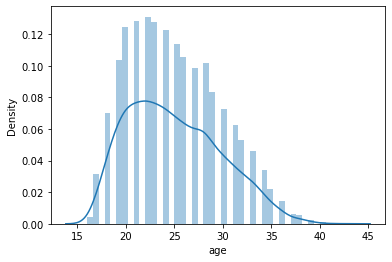

age


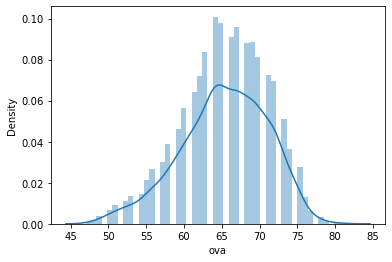

ova


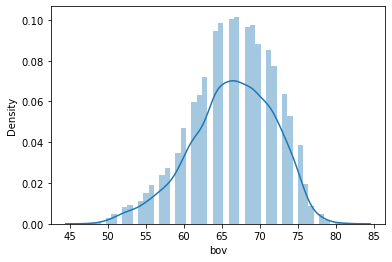

bov


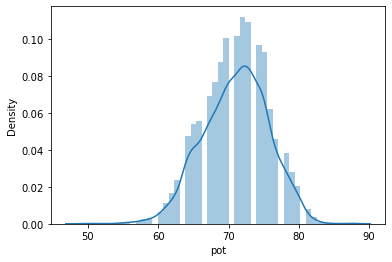

pot


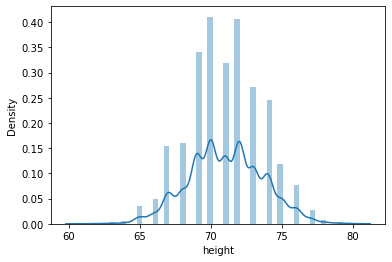

height


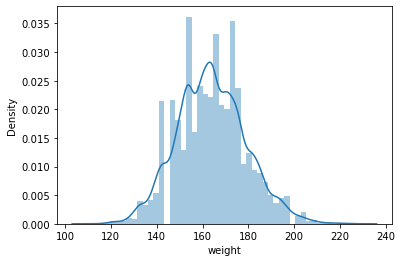

weight


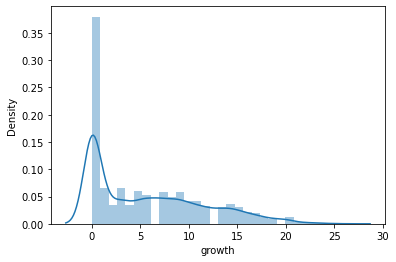

growth


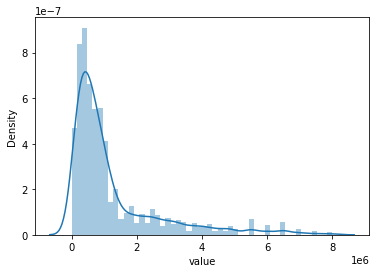

value


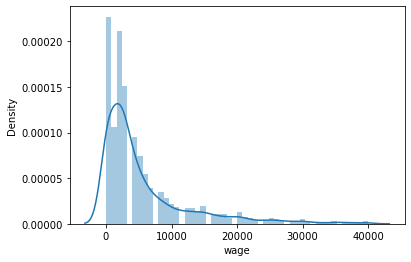

wage


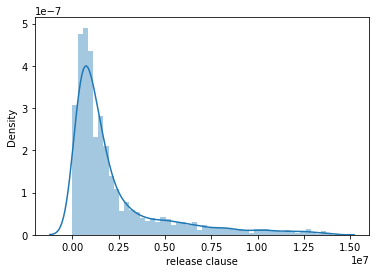

release clause


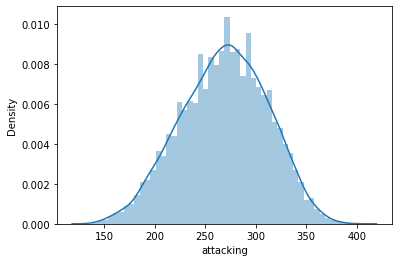

attacking


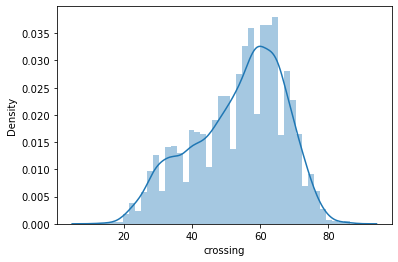

crossing


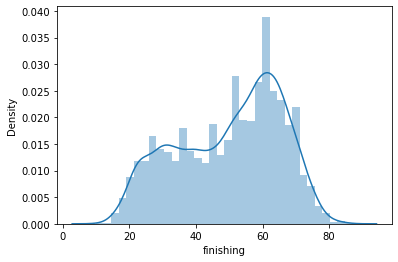

finishing


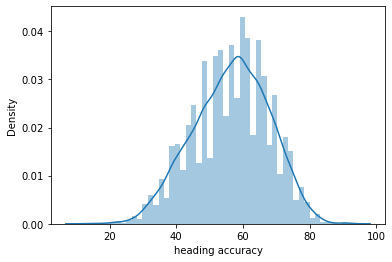

heading accuracy


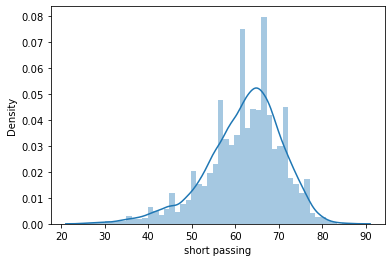

short passing


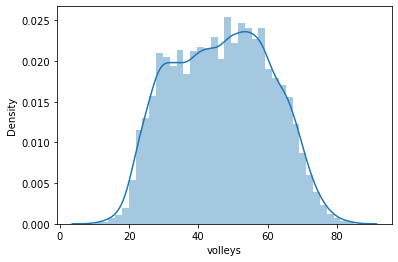

volleys


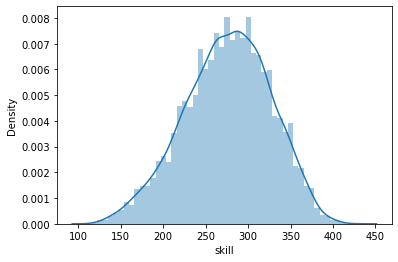

skill


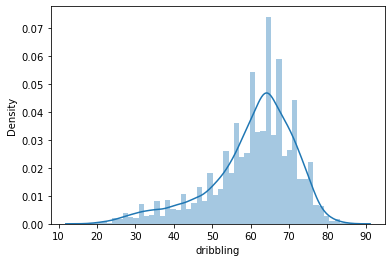

dribbling


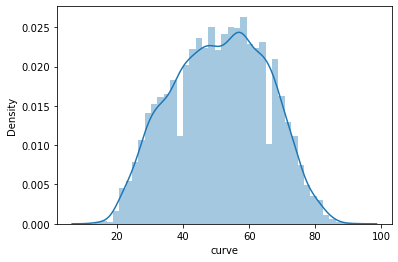

curve


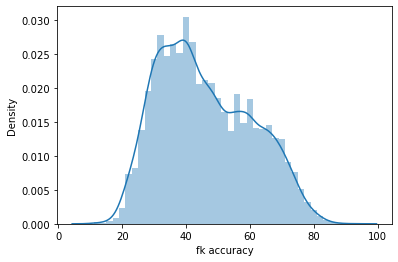

fk accuracy


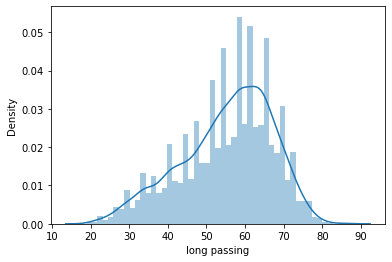

long passing


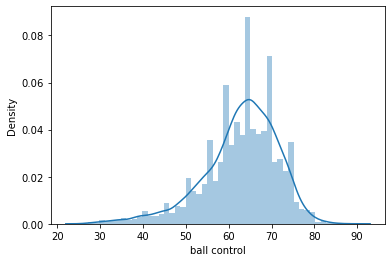

ball control


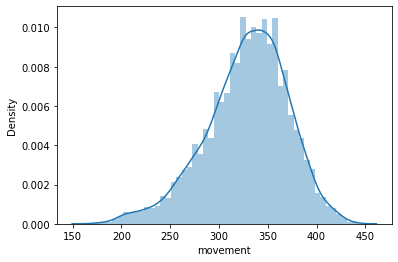

movement


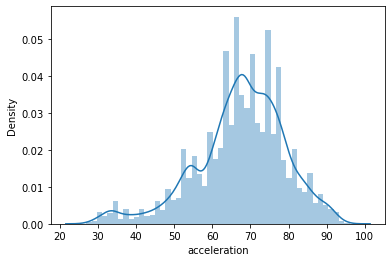

acceleration


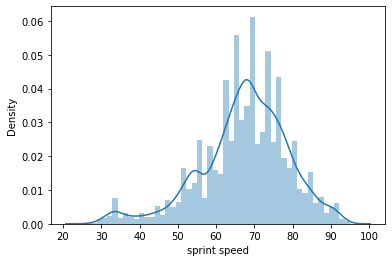

sprint speed


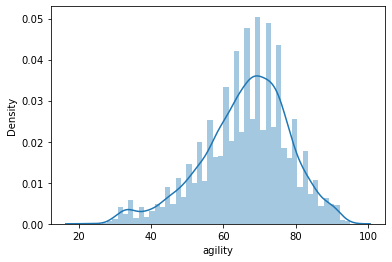

agility


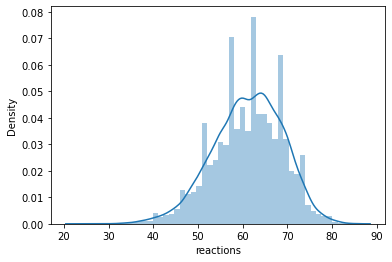

reactions


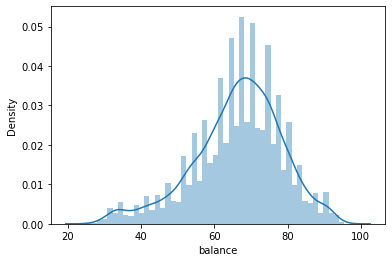

balance


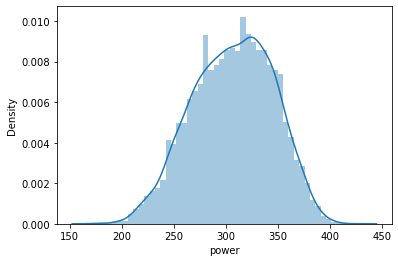

power


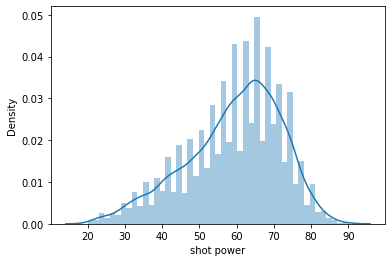

shot power


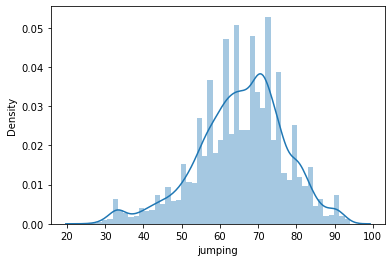

jumping


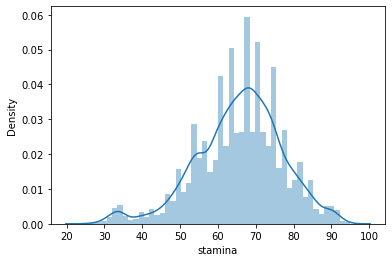

stamina


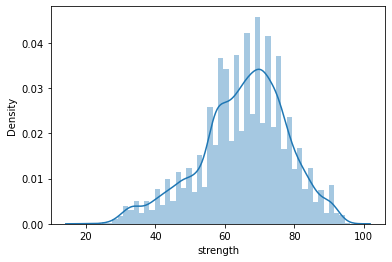

strength


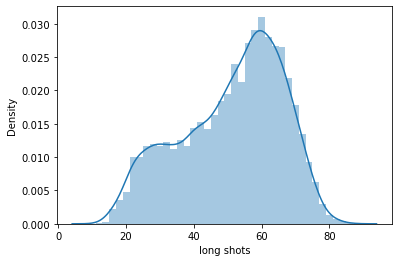

long shots


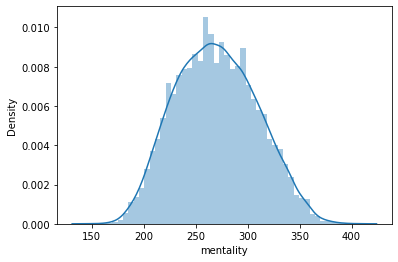

mentality


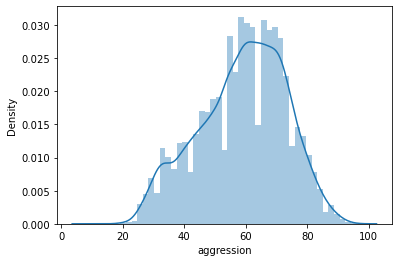

aggression


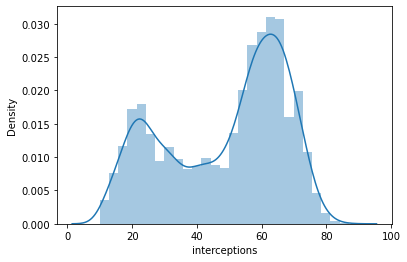

interceptions


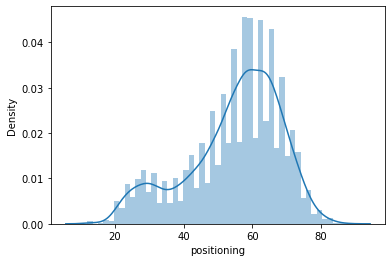

positioning


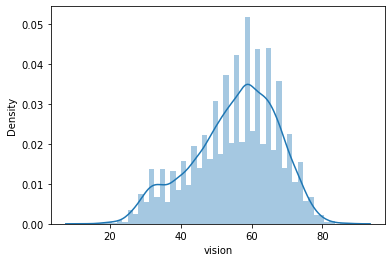

vision


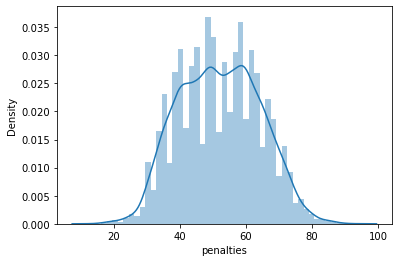

penalties


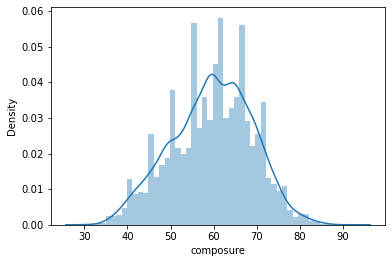

composure


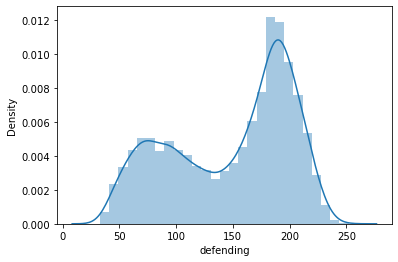

defending


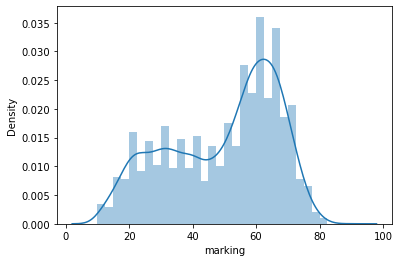

marking


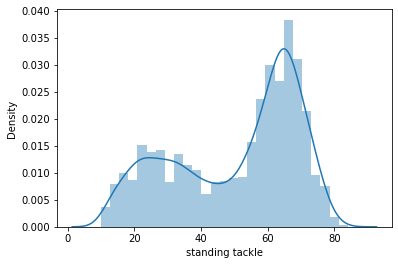

standing tackle


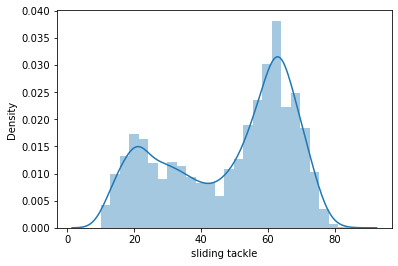

sliding tackle


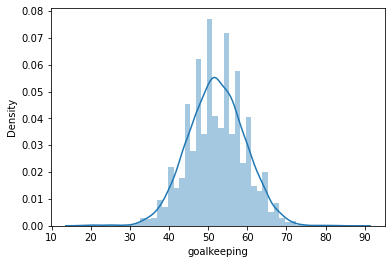

goalkeeping


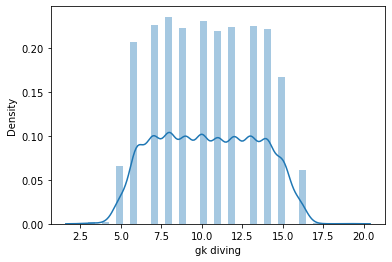

gk diving


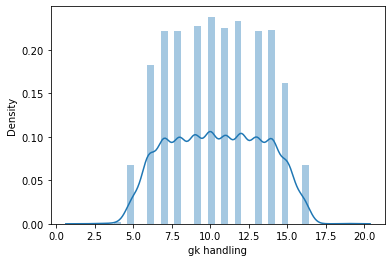

gk handling


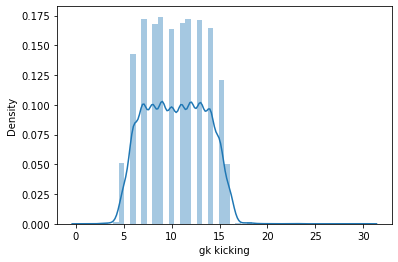

gk kicking


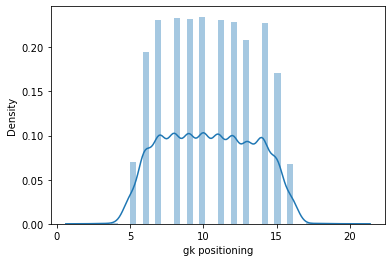

gk positioning


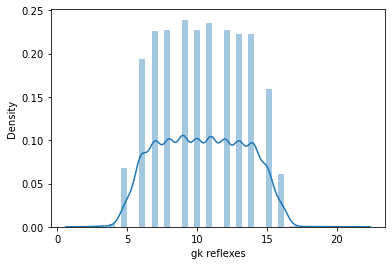

gk reflexes


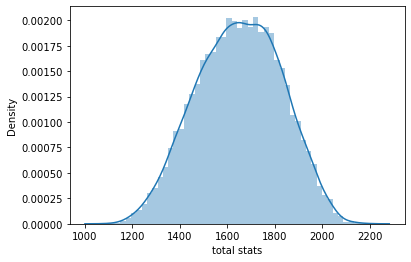

total stats


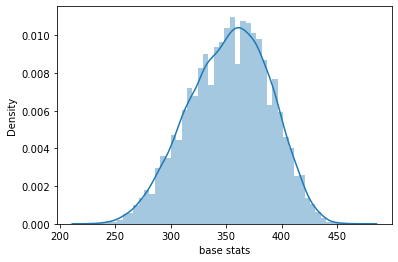

base stats


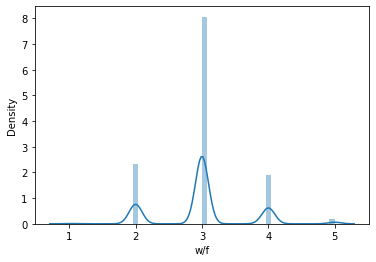

w/f


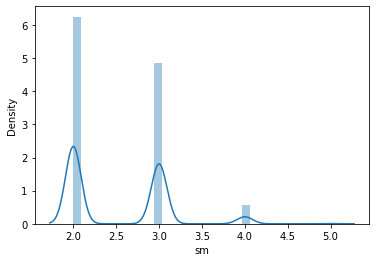

sm


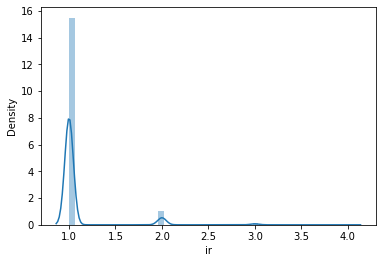

ir


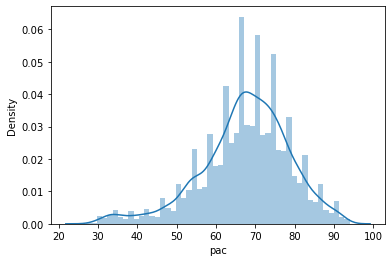

pac


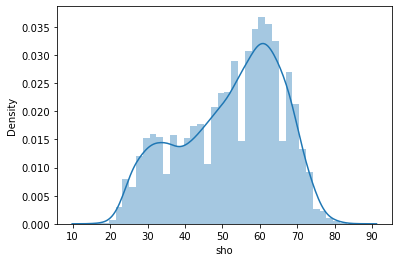

sho


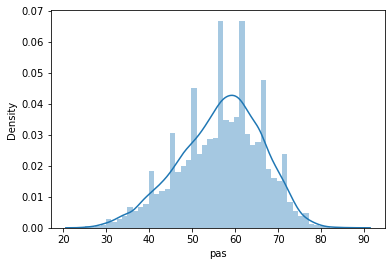

pas


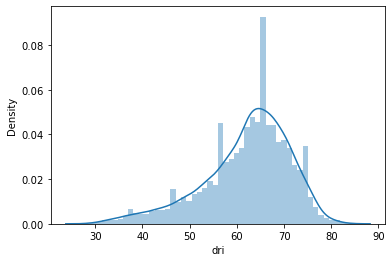

dri


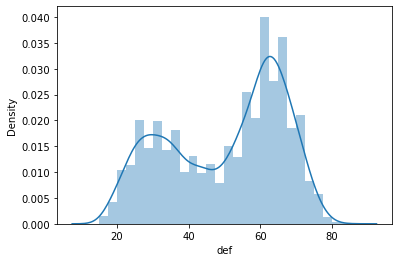

def


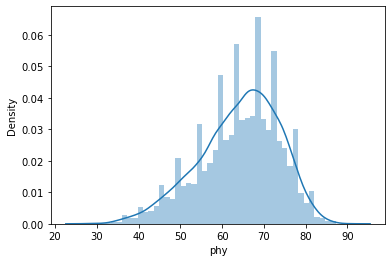

phy


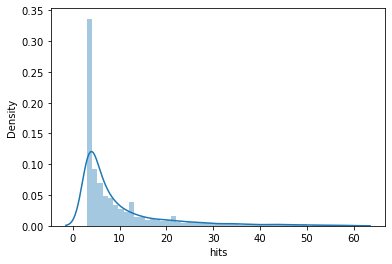

hits


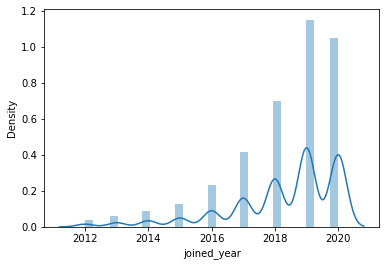

joined_year


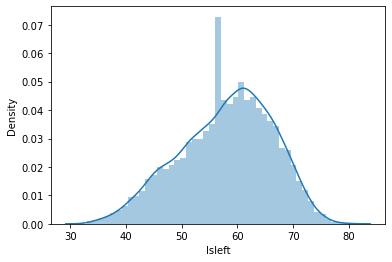

lsleft


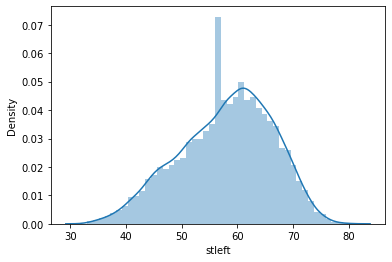

stleft


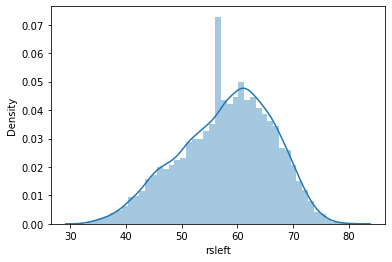

rsleft


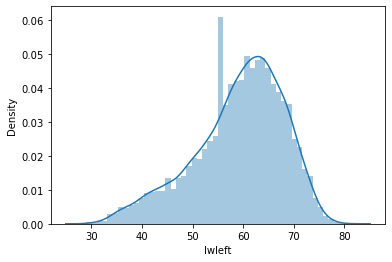

lwleft


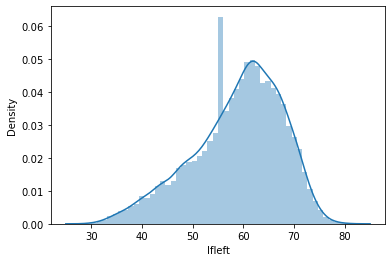

lfleft


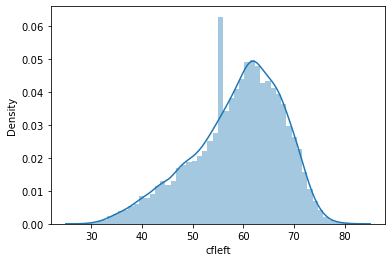

cfleft


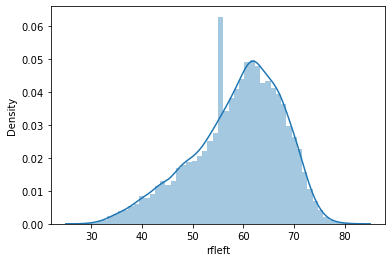

rfleft


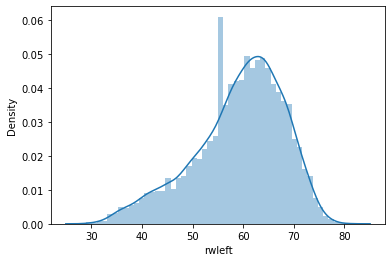

rwleft


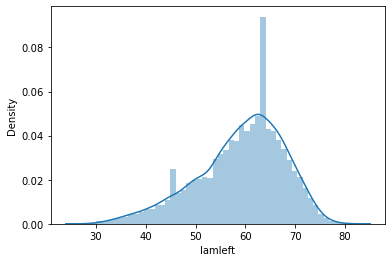

lamleft


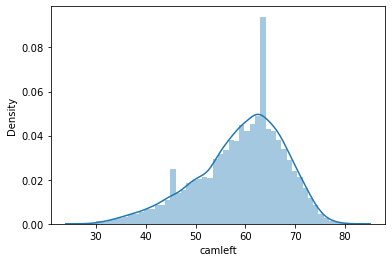

camleft


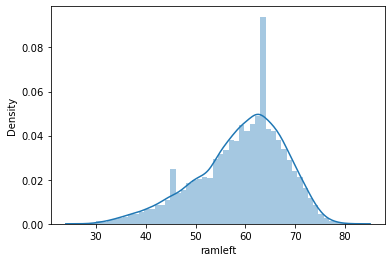

ramleft


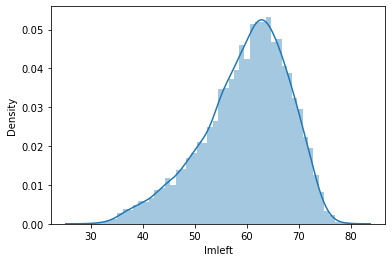

lmleft


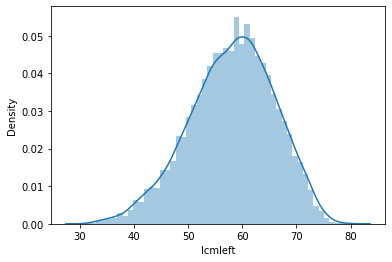

lcmleft


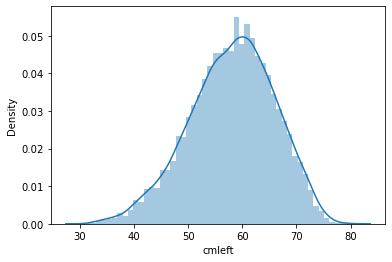

cmleft


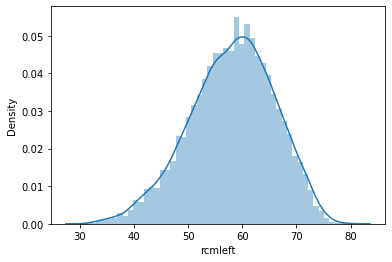

rcmleft


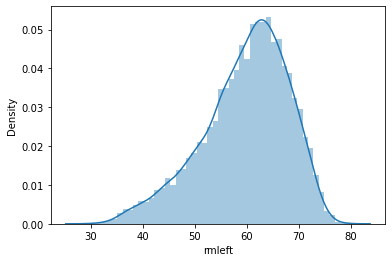

rmleft


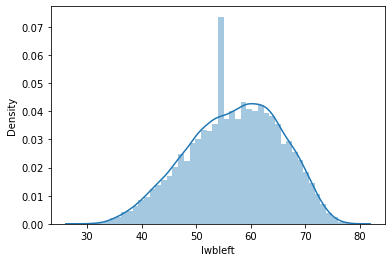

lwbleft


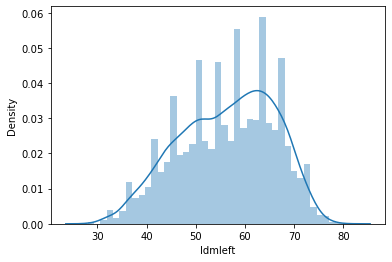

ldmleft


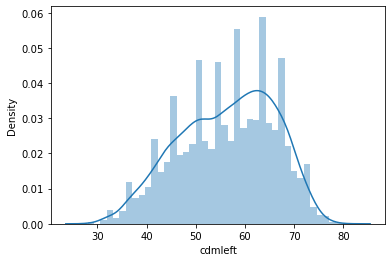

cdmleft


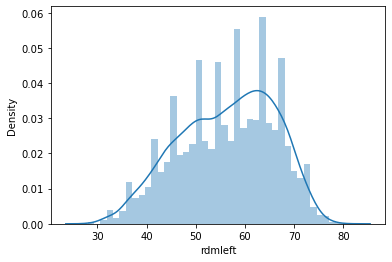

rdmleft


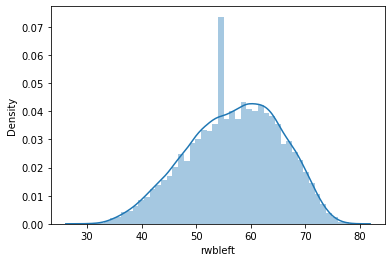

rwbleft


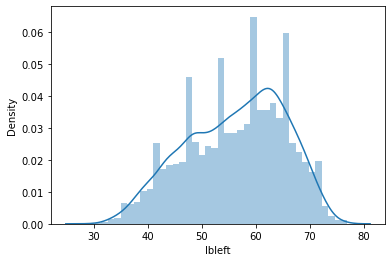

lbleft


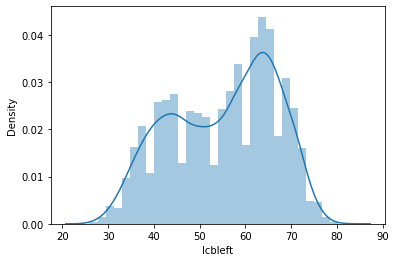

lcbleft


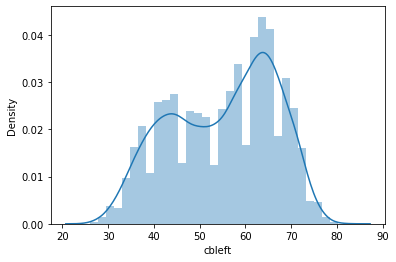

cbleft


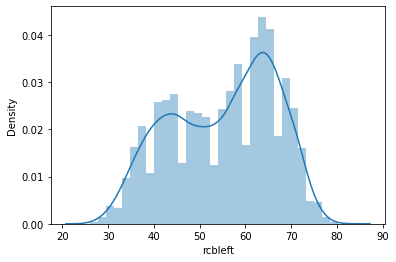

rcbleft


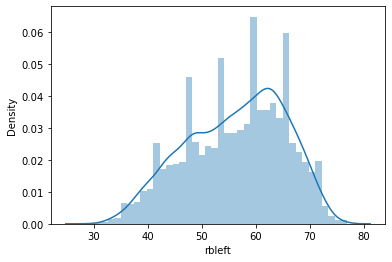

rbleft


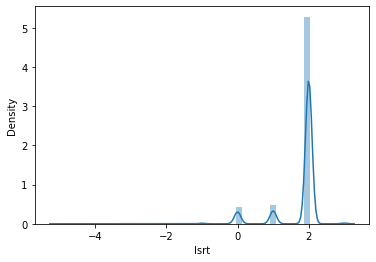

lsrt


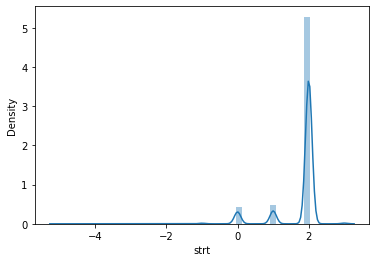

strt


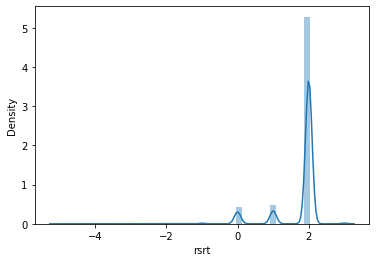

rsrt


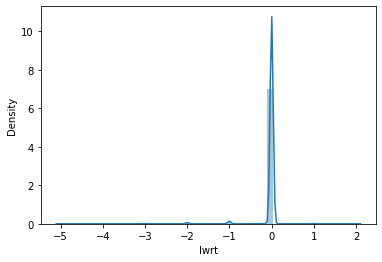

lwrt


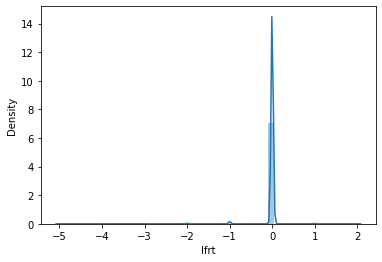

lfrt


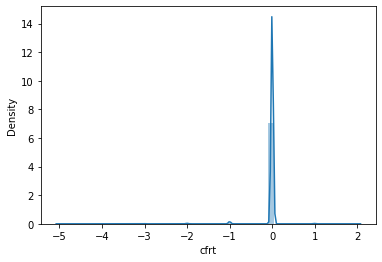

cfrt


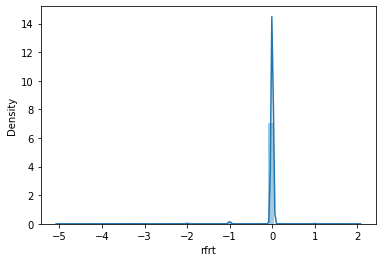

rfrt


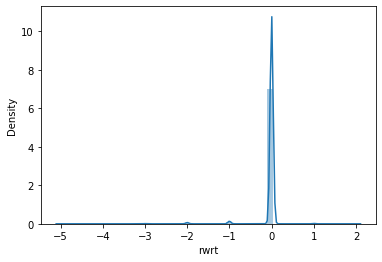

rwrt


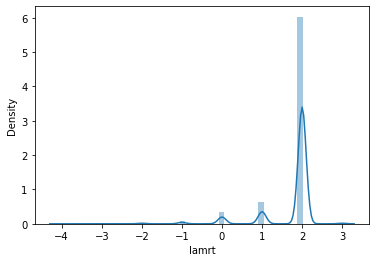

lamrt


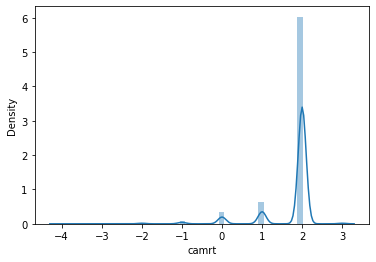

camrt


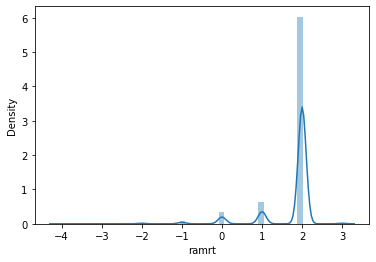

ramrt


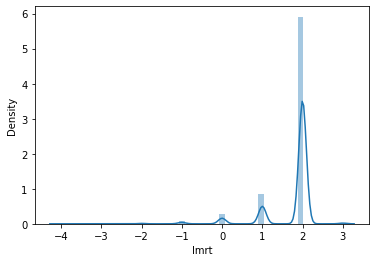

lmrt


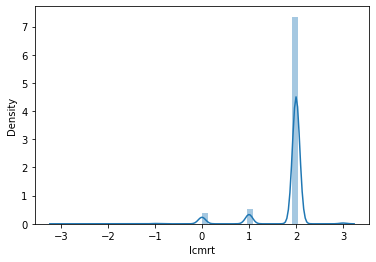

lcmrt


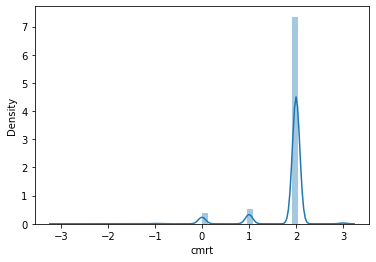

cmrt


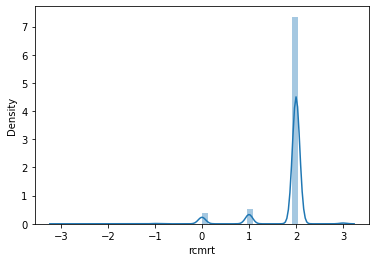

rcmrt


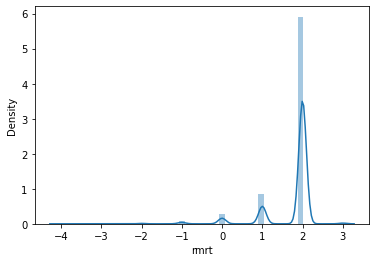

rmrt


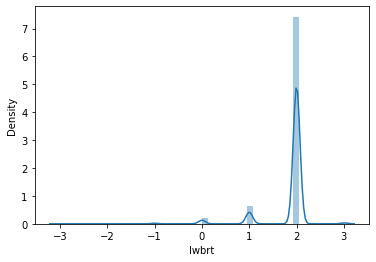

lwbrt


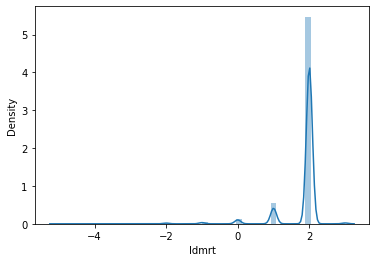

ldmrt


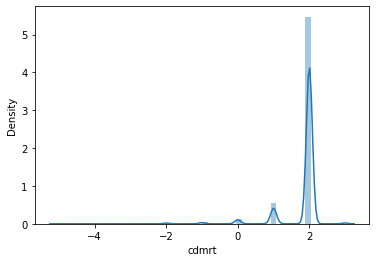

cdmrt


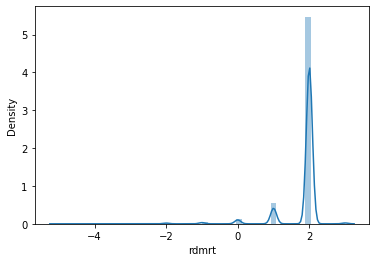

rdmrt


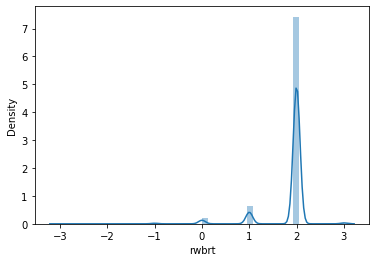

rwbrt


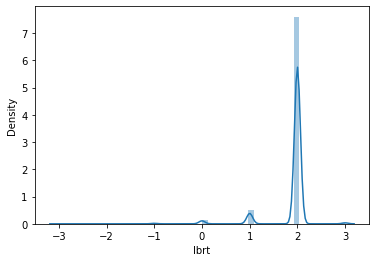

lbrt


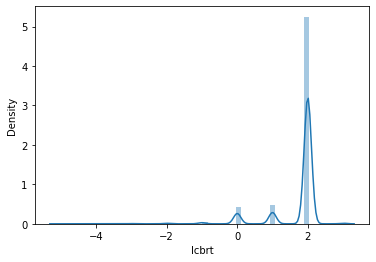

lcbrt


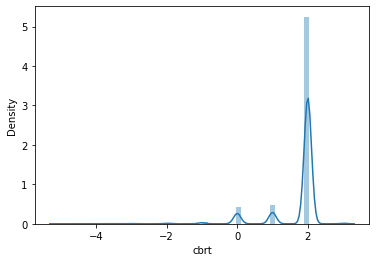

cbrt


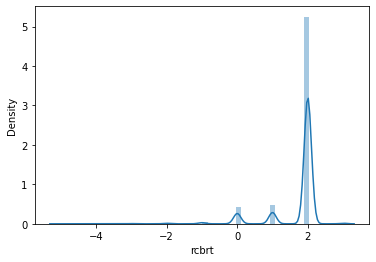

rcbrt


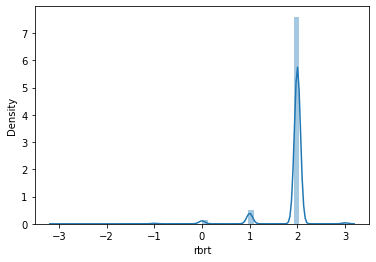

rbrt


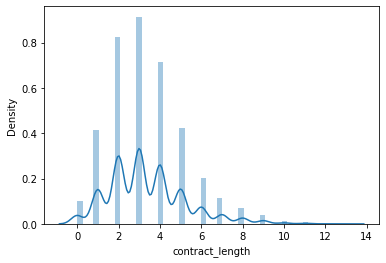

contract_length


In [1603]:
# checking distribustions of numerical values before transforations
for i in xnum.columns:
    sns.distplot(xnum[i])
    plt.show()
    print(i)

In [1604]:
#making data to normalize and to standardize, so I can try the outcomes with bother methods
xnum1 = xnum.copy()
xnum2 = xnum.copy()

In [1605]:
#normalized
transformer = Normalizer().fit(xnum1)
xnormalized = transformer.transform(xnum1)
xnormalized = pd.DataFrame(xnormalized)

In [1606]:
#standardized
transformer = StandardScaler().fit(xnum2)
xstandardized=transformer.transform(xnum2)
xstandardized=pd.DataFrame(xstandardized)

### After testing both, it becames clear StandardScaler()  provided the best results

In [1620]:
myx=xstandardized

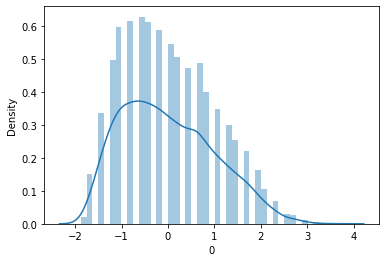

0


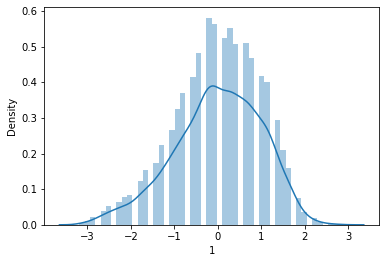

1


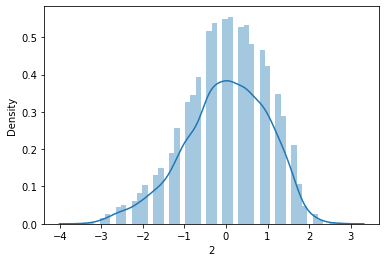

2


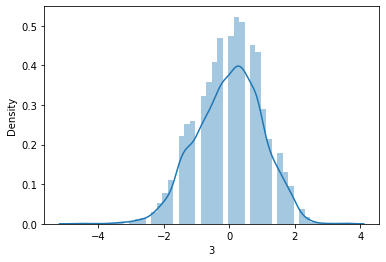

3


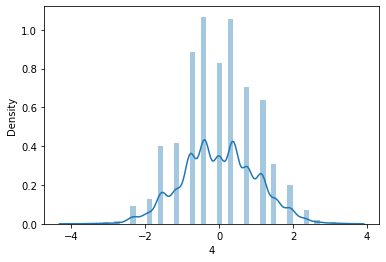

4


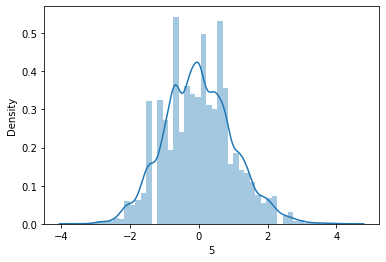

5


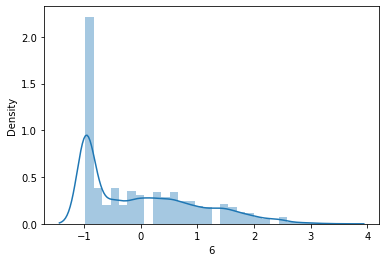

6


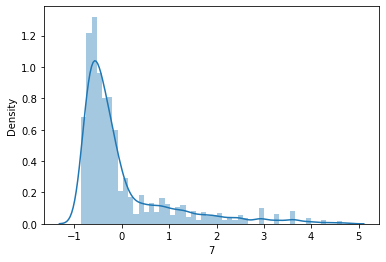

7


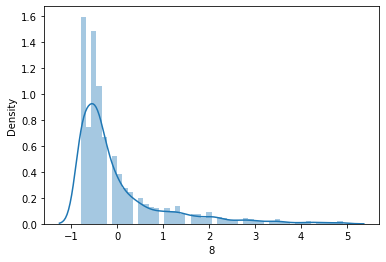

8


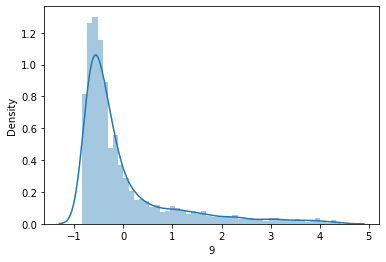

9


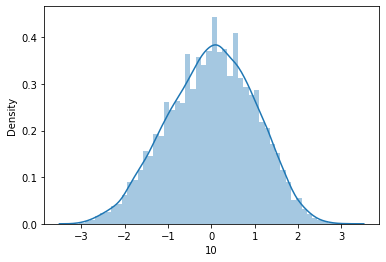

10


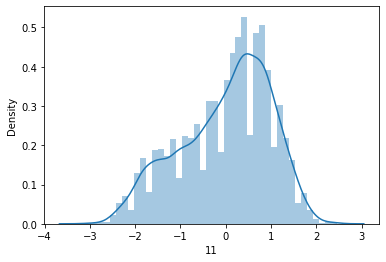

11


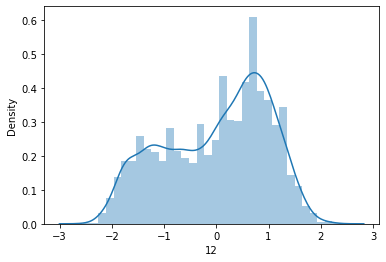

12


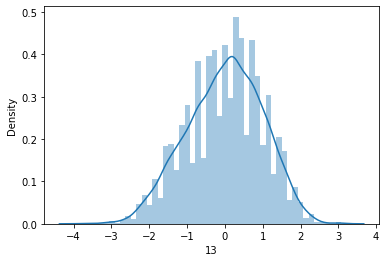

13


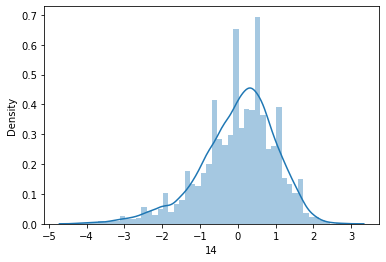

14


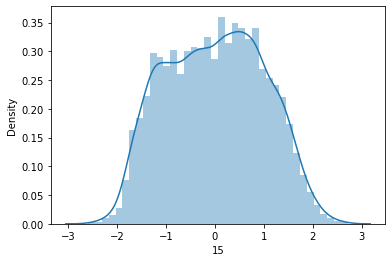

15


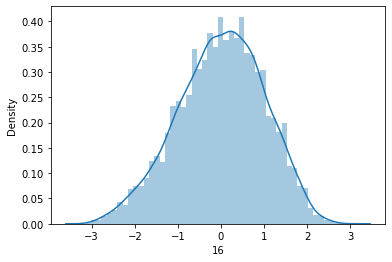

16


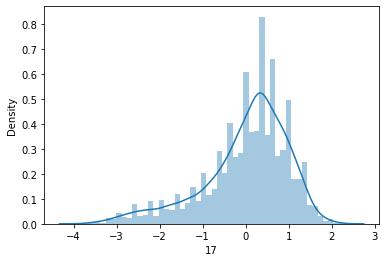

17


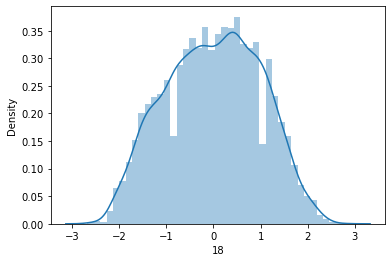

18


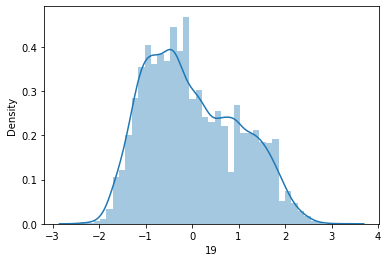

19


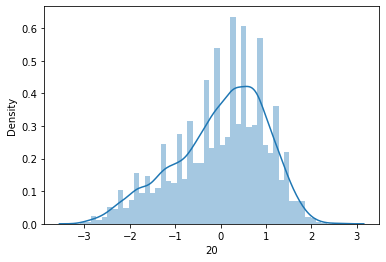

20


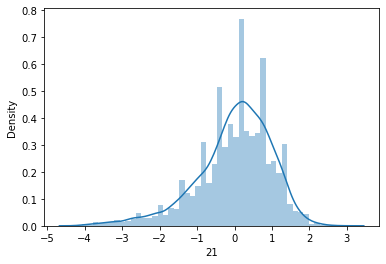

21


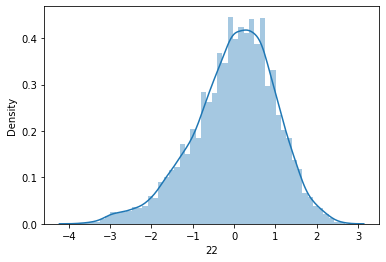

22


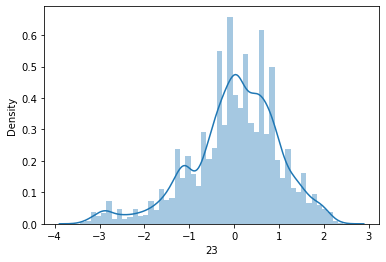

23


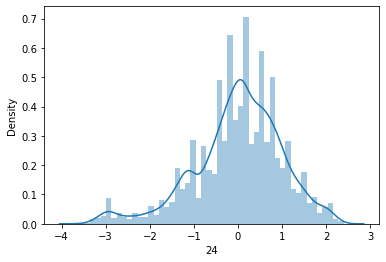

24


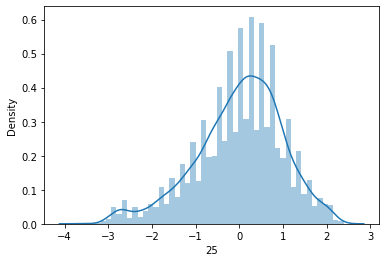

25


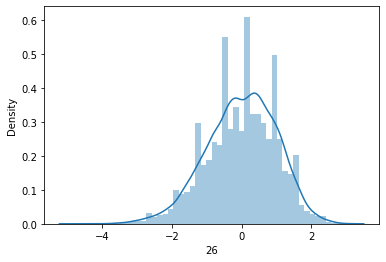

26


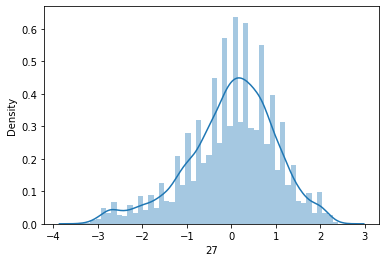

27


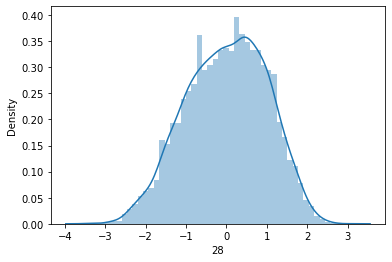

28


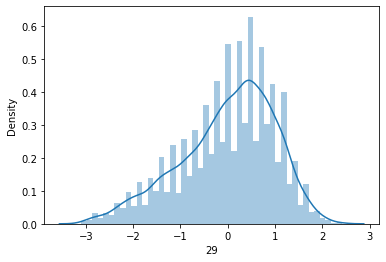

29


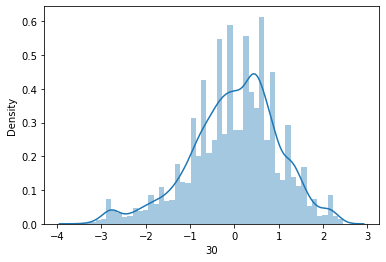

30


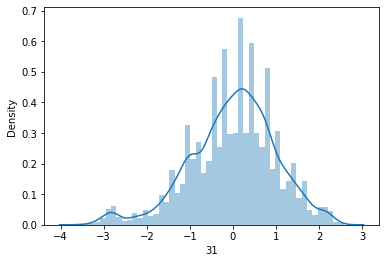

31


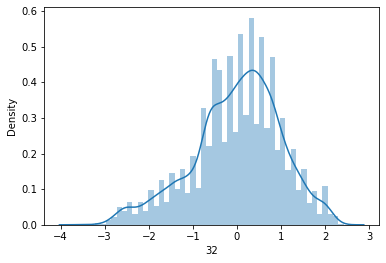

32


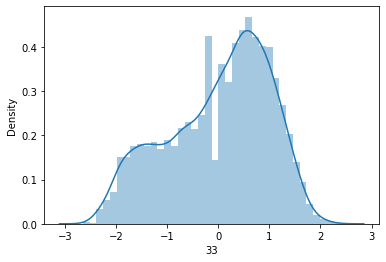

33


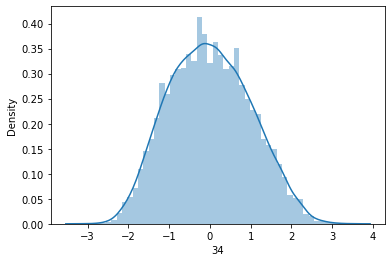

34


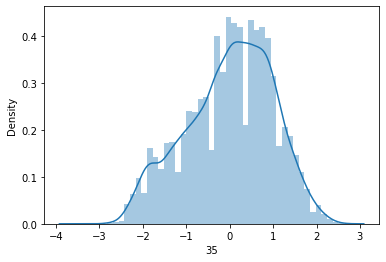

35


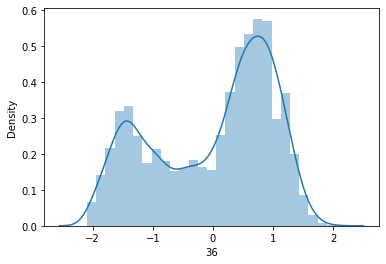

36


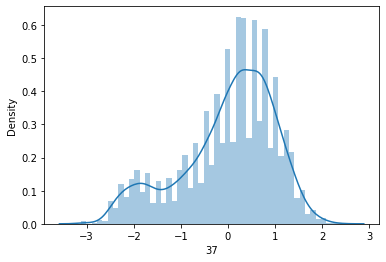

37


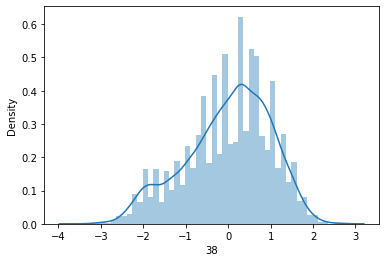

38


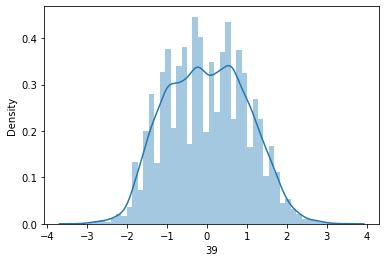

39


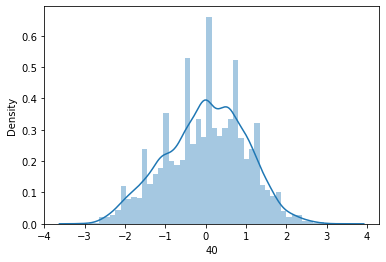

40


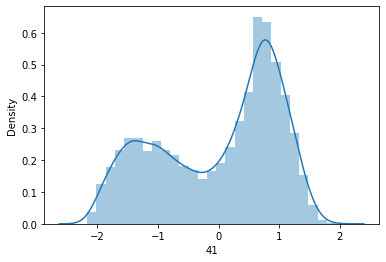

41


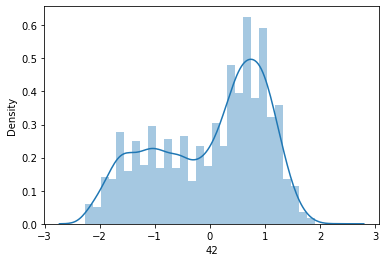

42


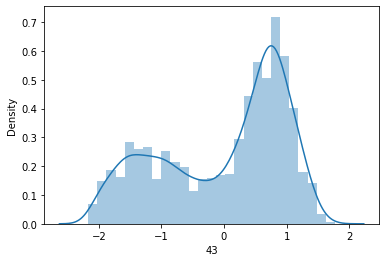

43


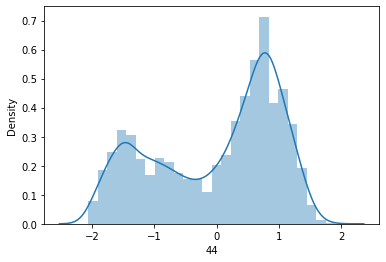

44


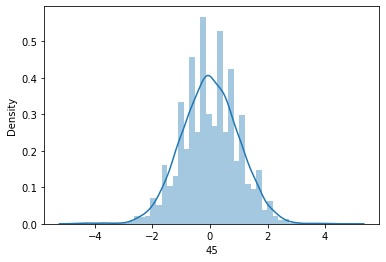

45


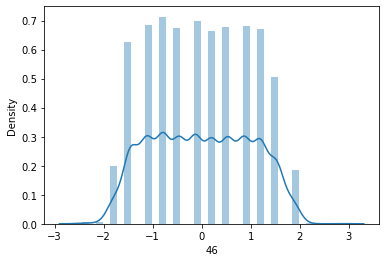

46


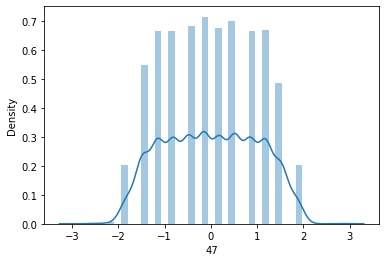

47


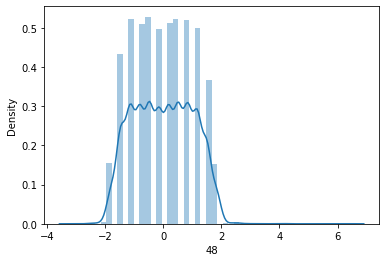

48


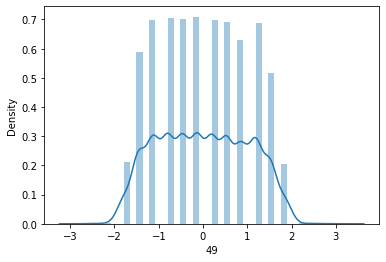

49


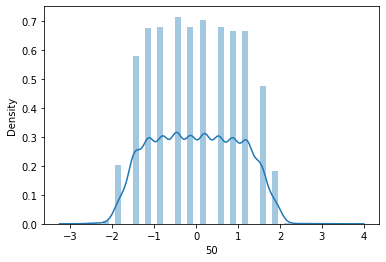

50


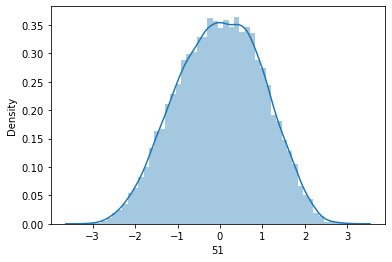

51


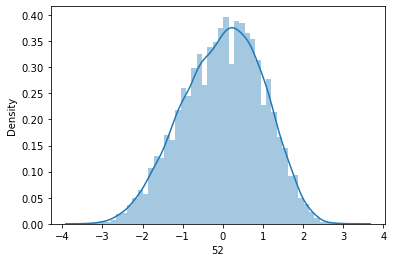

52


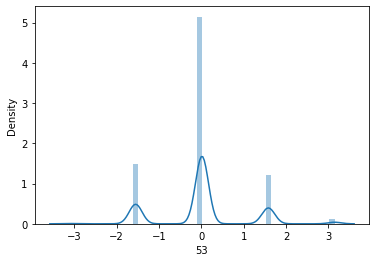

53


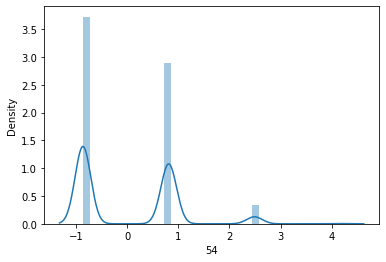

54


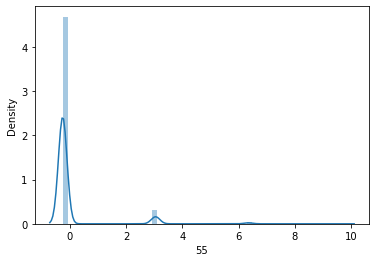

55


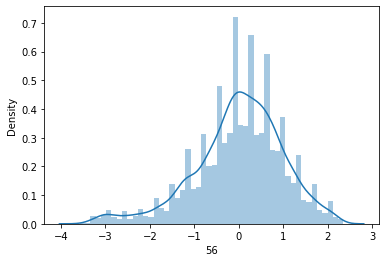

56


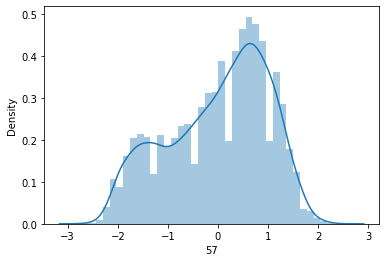

57


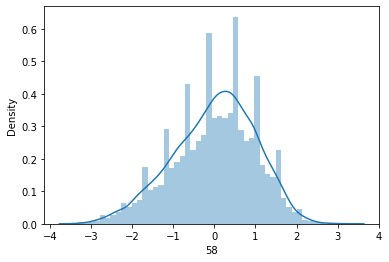

58


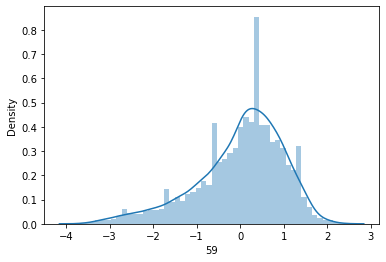

59


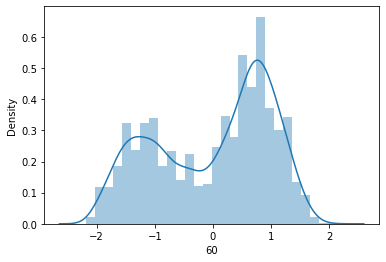

60


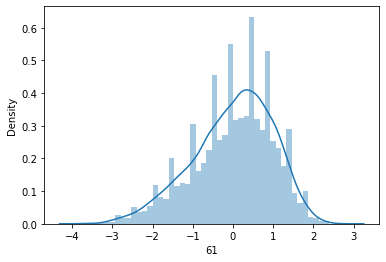

61


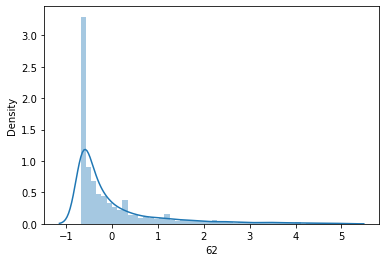

62


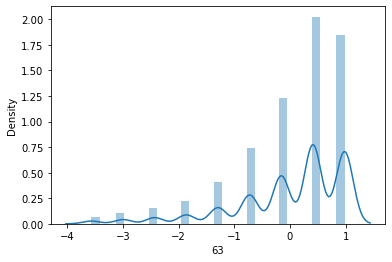

63


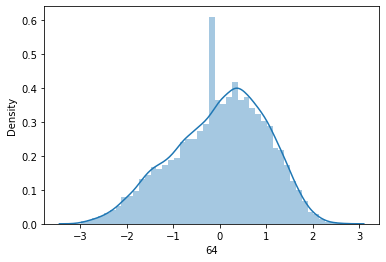

64


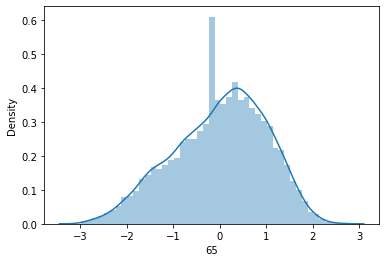

65


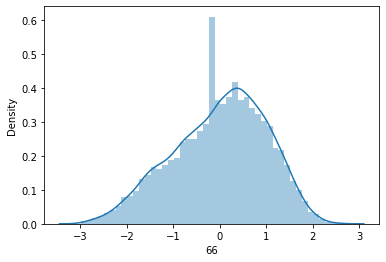

66


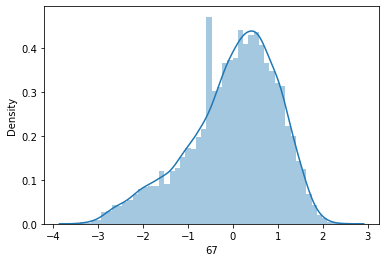

67


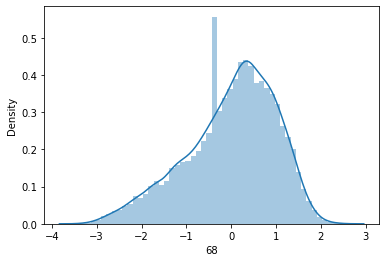

68


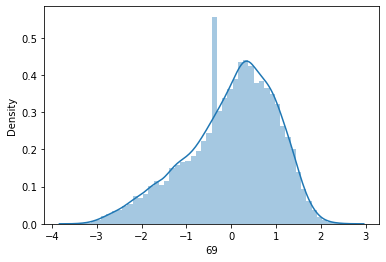

69


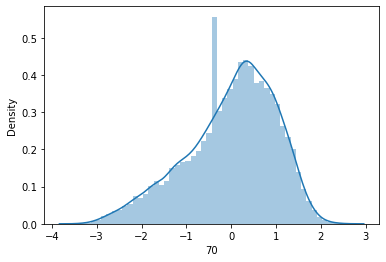

70


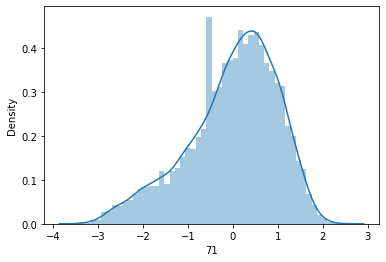

71


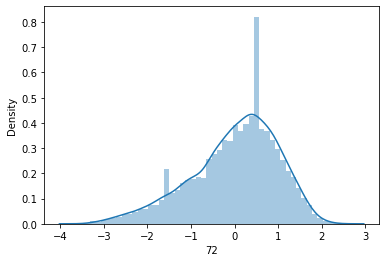

72


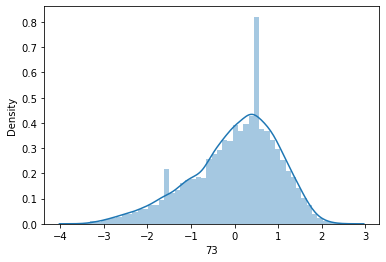

73


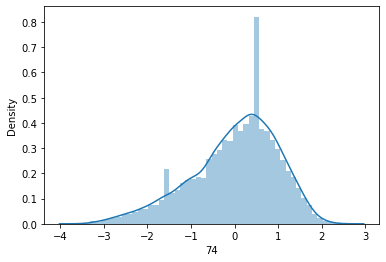

74


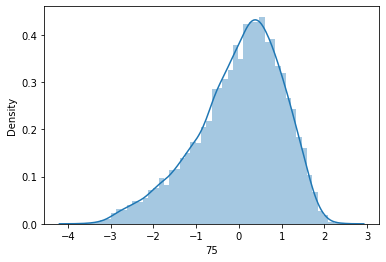

75


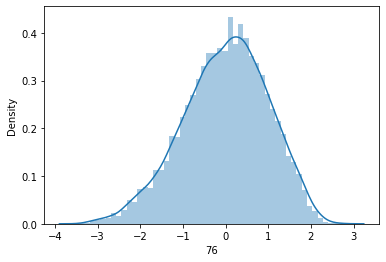

76


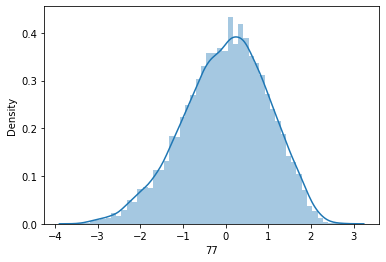

77


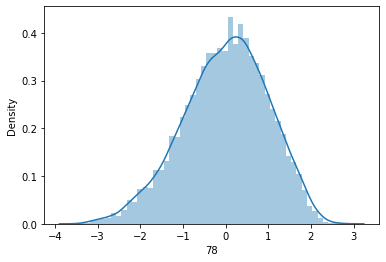

78


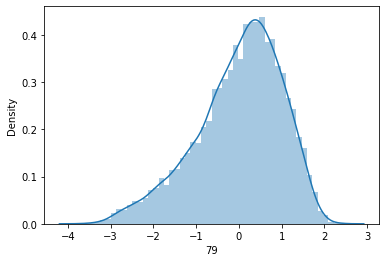

79


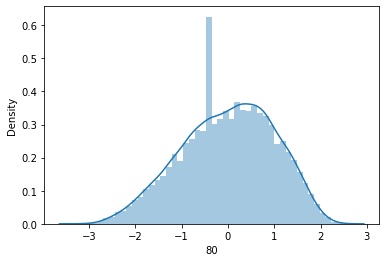

80


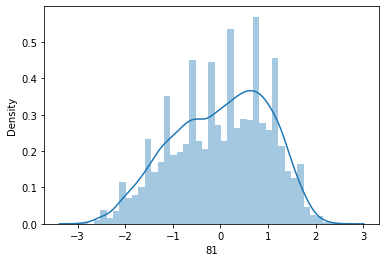

81


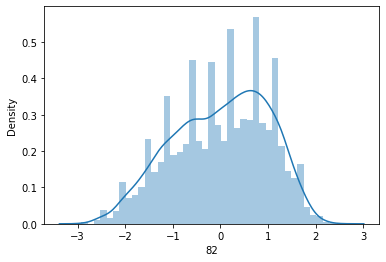

82


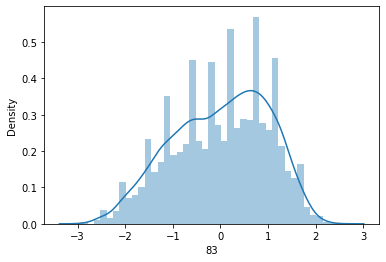

83


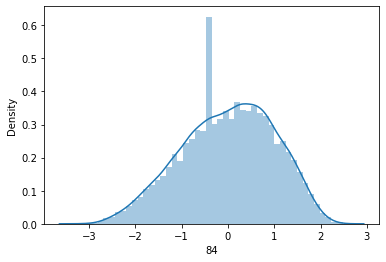

84


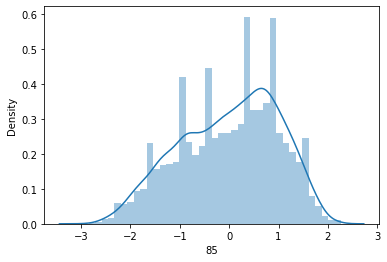

85


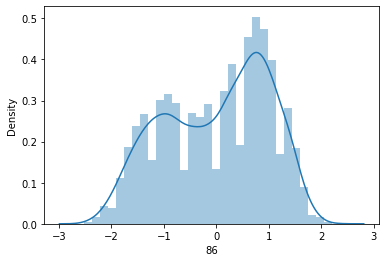

86


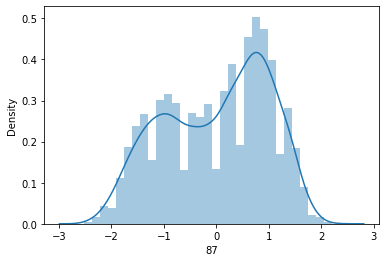

87


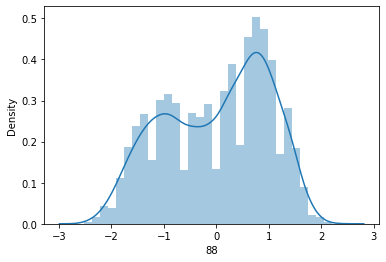

88


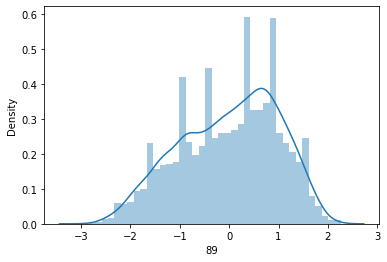

89


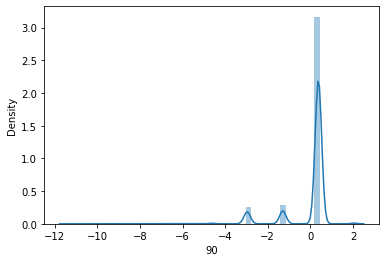

90


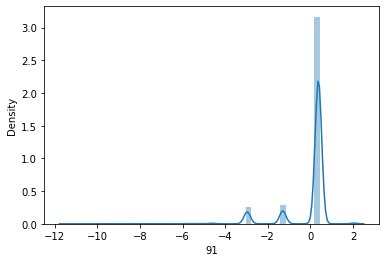

91


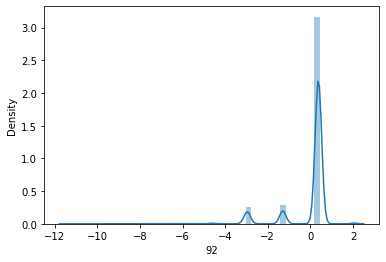

92


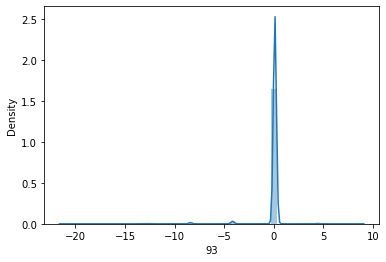

93


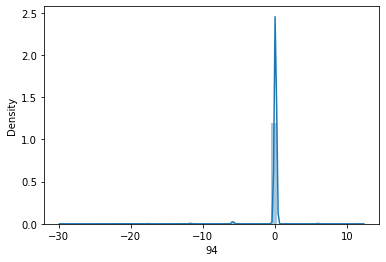

94


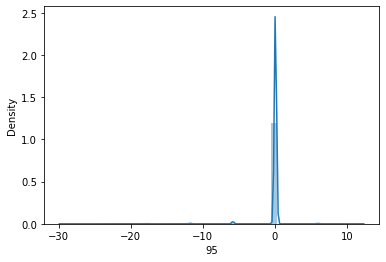

95


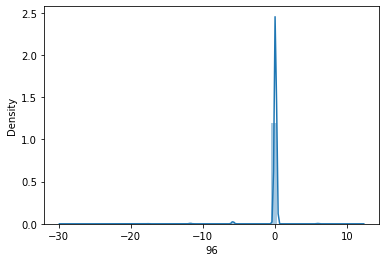

96


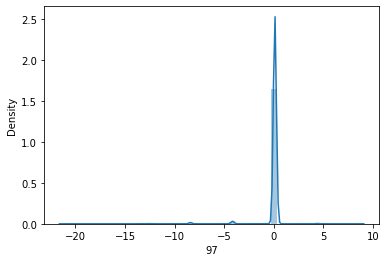

97


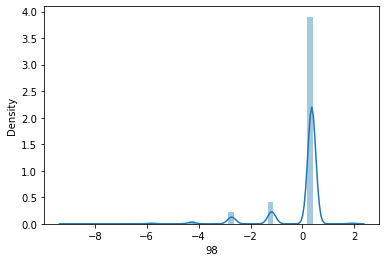

98


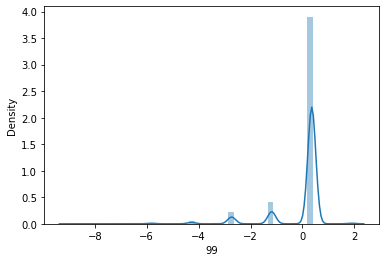

99


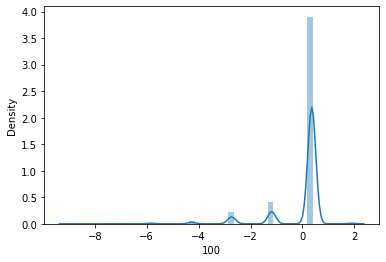

100


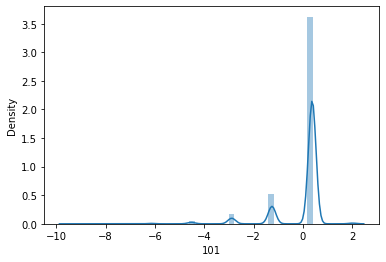

101


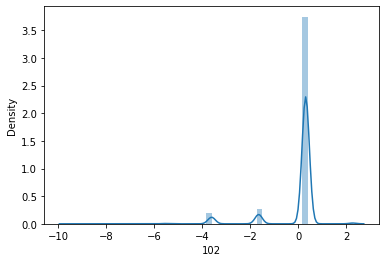

102


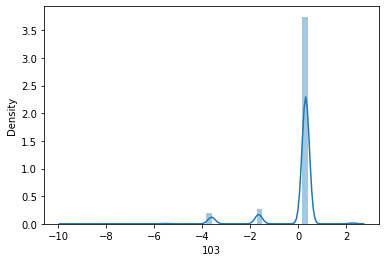

103


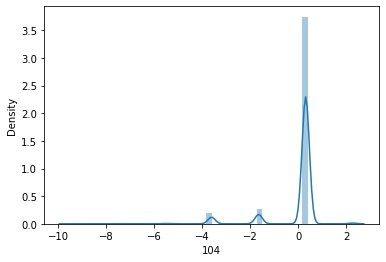

104


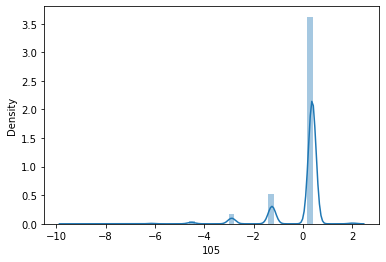

105


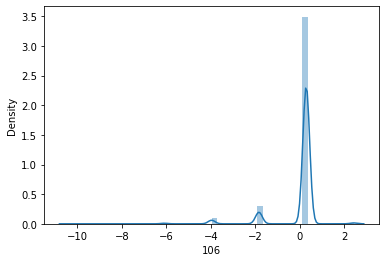

106


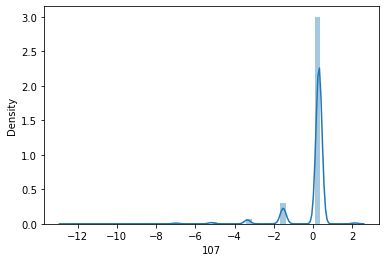

107


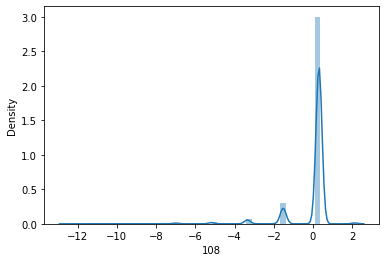

108


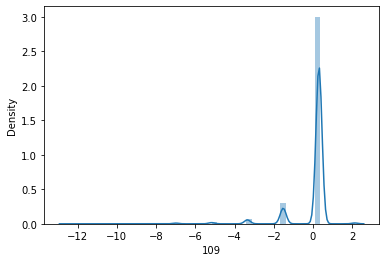

109


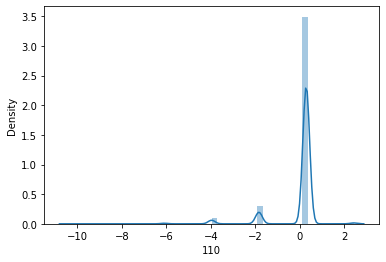

110


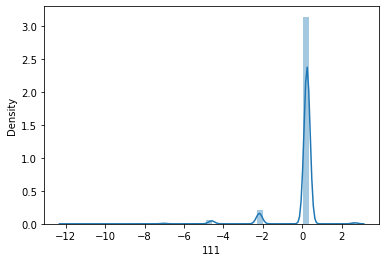

111


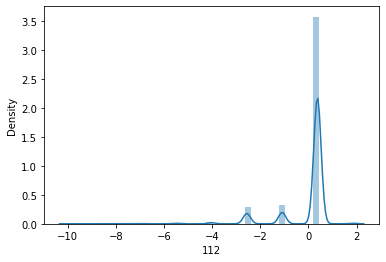

112


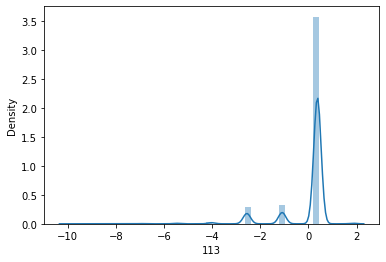

113


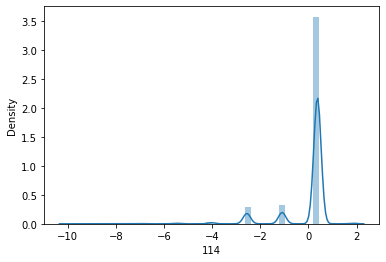

114


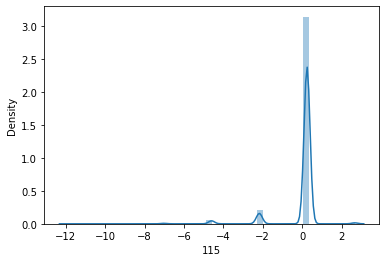

115


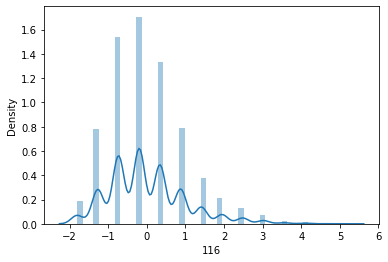

116


In [1621]:
#veiwing distribustions with the normalizer and/or scaler applied
for i in myx.columns:
    sns.distplot(myx[i])
    plt.show()
    print(i)

### Adding columns names back to the concatinated dataset

In [1633]:
xcols=xnum.columns.append(encoded.columns)
xnum.columns
xcols

Index(['age', 'ova', 'bov', 'pot', 'height', 'weight', 'growth', 'value',
       'wage', 'release clause',
       ...
       'x0_LM', 'x0_RB', 'x0_RM', 'x0_ST', 'x0_other', 'x1_Left', 'x1_Right',
       'x2_High', 'x2_Low', 'x2_Medium'],
      dtype='object', length=132)

In [1634]:
x = np.concatenate((myx, encoded), axis=1)
pd.DataFrame(x).head()

0         1         2         3         4         5        6    \
0  2.502738  0.984060  0.659967 -0.005236 -0.396993 -1.389062 -0.97546   
1  1.668305  0.984060  0.843040 -0.005236 -0.781557 -0.190841 -0.97546   
2  2.711347  0.810476  1.392258 -0.219777 -0.781557 -0.057705 -0.97546   
3  2.502738  1.331227  1.026113  0.423845  1.141265  0.674542 -0.97546   
4  2.502738  0.116141 -0.072323 -1.077940  0.756701  2.738146 -0.97546   

        7         8         9         10        11        12        13   \
0 -0.445955  0.199042 -0.425737  1.592988  1.081331  0.897971  0.397071   
1 -0.101623  1.339181 -0.840412  1.592988  1.985393  0.897971 -1.362719   
2 -0.728307  3.476943 -0.840412  1.732987  1.232008  1.918018 -0.570814   
3 -0.859153  0.056524 -0.840412 -0.880327 -1.329500 -1.779652  1.276966   
4 -0.804060 -0.228510 -0.840412  1.149658  0.101931  0.834218  1.276966   

        14        15        16        17        18        19        20   \
0  1.606731  1.509632  1.837601  0.767279  1.954134  2.273385  1.331354   
1  1.721802  2.004417  2.191795  1.659605  2.304876  2.136108  1.161296   
2  1.031377  1.792366  1.975343  1.034977  1.813838  2.410663  0.736150   
3  0.340951 -0.681559 -0.366273 -0.571210 -0.360760 -1.433097  0.566092   
4  0.801235  0.944163 -0.208854  0.231883  0.691465 -1.364459 -1.049460   

        21        22        23        24        25        26        27   \
0  0.932676 -0.555810 -0.969252 -1.508577 -0.344769  0.487160  0.463333   
1  1.733593 -0.792091 -1.649288 -2.202608  0.401444 -0.282989  0.710168   
2  2.191260 -2.020758 -3.434382 -3.156900 -2.003021  2.412533 -0.277172   
3  0.818259 -2.020758 -1.479279 -2.896639 -2.334672  1.128951 -1.264512   
4  1.047093 -1.973501 -2.159315 -1.942346 -1.339720  0.102086 -1.675903   

        28        29        30        31        32        33        34   \
0  0.445674  1.235462 -0.989605 -0.143346 -0.416366  1.327463  2.351868   
1 -0.584193  0.999044 -0.644796 -3.217772 -0.731700  1.194891  1.204676   
2 -1.588314  0.841432 -2.713647 -3.129931 -2.466033  1.725180  1.892991   
3 -1.124873 -0.892302  0.734437 -2.866409  0.687300 -1.125124  0.184951   
4  0.574408  1.393074  1.079246 -2.866409  1.948634  0.001741  1.510594   

        35        36        37        38        39        40        41   \
0  0.858632  1.189671  1.260719  1.486505  1.894864  2.068776  0.080874   
1  0.716969 -0.533049  1.041586  1.569874  1.151598  0.033100 -0.931383   
2  0.150318 -0.533049  1.991162  2.070093  2.472960  0.033100 -1.118838   
3  0.575307  1.458846 -1.295833 -0.014152 -0.830446  0.033100  1.355568   
4  0.858632  0.489816  0.895497  0.986286  1.151598  0.033100 -0.444000   

        42        43        44        45        46        47        48   \
0  1.183664 -0.411982 -0.455381  0.532175 -0.456808  0.515191  0.844038   
1 -0.831947 -0.891933 -0.990249 -0.147341 -0.456808 -1.484644  0.844038   
2 -1.407836 -0.838605 -1.043736 -1.370468  0.204674 -0.818033 -1.461295   
3  1.414020  1.401164  1.149224  0.532175 -0.787550 -0.484727  1.173371   
4 -0.544002 -0.358655 -0.401894  2.163011  0.866157  0.848496  1.502704   

        49        50        51        52        53        54        55   \
0  0.192948  0.201998  1.428173  0.888806  1.581872  0.811774 -0.261305   
1  1.846827 -1.133265  0.669247  0.031397  1.581872  2.488670  3.045216   
2 -1.460931  0.201998  0.178177 -0.853671  3.147929  2.488670  6.351737   
3  0.523724  0.869629 -0.569588 -0.853671  0.015816 -0.865121  6.351737   
4  1.516051  0.535813  0.161436 -0.079237  1.581872 -0.865121  3.045216   

        56        57        58        59        60        61        62   \
0 -1.275125  1.253380  1.711101  0.750770  0.469491 -0.116605 -0.582383   
1 -1.983221  1.178676  2.025174  1.618306 -0.886187 -1.258817  0.131498   
2 -3.399413  1.851014  1.606410  1.076096 -1.009431 -2.712542 -0.174451   
3 -2.337269 -1.510677 -0.278028 -0.442091  1.517061 -0.220443 -0.276434   
4 -2.071733  0.879859  0.245427

In [1635]:
x=pd.DataFrame(x)
x


0         1         2         3         4         5         6    \
0      2.502738  0.984060  0.659967 -0.005236 -0.396993 -1.389062 -0.975460   
1      1.668305  0.984060  0.843040 -0.005236 -0.781557 -0.190841 -0.975460   
2      2.711347  0.810476  1.392258 -0.219777 -0.781557 -0.057705 -0.975460   
3      2.502738  1.331227  1.026113  0.423845  1.141265  0.674542 -0.975460   
4      2.502738  0.116141 -0.072323 -1.077940  0.756701  2.738146 -0.975460   
...         ...       ...       ...       ...       ...       ...       ...   
11877 -1.252212 -1.966863 -1.903049 -0.648858  0.756701 -0.190841  1.423148   
11878 -1.460820 -1.619696 -1.536904 -1.077940 -0.396993  0.408270  0.737831   
11879 -1.460820 -1.619696 -1.903049 -0.863399 -0.781557 -0.656816  0.909160   
11880 -1.043604 -0.578193 -0.804614  0.423845 -0.781557 -1.056223  0.909160   
11881 -1.460820 -1.098945 -0.987686  0.638386 -0.396993 -0.656816  1.594477   

            7         8         9         10        11        12        13   \
0     -0.445955  0.199042 -0.425737  1.592988  1.081331  0.897971  0.397071   
1     -0.101623  1.339181 -0.840412  1.592988  1.985393  0.897971 -1.362719   
2     -0.728307  3.476943 -0.840412  1.732987  1.232008  1.918018 -0.570814   
3     -0.859153  0.056524 -0.840412 -0.880327 -1.329500 -1.779652  1.276966   
4     -0.804060 -0.228510 -0.840412  1.149658  0.101931  0.834218  1.276966   
...         ...       ...       ...       ...       ...       ...       ...   
11877 -0.755854 -0.785754 -0.706208 -1.066992 -1.781531  0.324195 -0.394835   
11878 -0.769627 -0.371028 -0.737497 -0.483663 -0.274762 -0.440841 -0.570814   
11879 -0.769627 -0.513545 -0.737497 -1.183658  0.101931 -1.014617 -0.306845   
11880 -0.532038 -0.371028 -0.544862 -1.066992  0.629300 -1.524641 -0.394835   
11881 -0.635337 -0.513545 -0.543354 -0.343664 -1.630854  0.897971  0.221092   

            14        15        16        17        18        19        20   \
0      1.606731  1.509632  1.837601  0.767279  1.954134  2.273385  1.331354   
1      1.721802  2.004417  2.191795  1.659605  2.304876  2.136108  1.161296   
2      1.031377  1.792366  1.975343  1.034977  1.813838  2.410663  0.736150   
3      0.340951 -0.681559 -0.366273 -0.571210 -0.360760 -1.433097  0.566092   
4      0.801235  0.944163 -0.208854  0.231883  0.691465 -1.364459 -1.049460   
...         ...       ...       ...       ...       ...       ...       ...   
11877 -2.190608 -0.257458 -1.507565 -0.928141 -0.921947 -1.089904 -2.239867   
11878  0.225881 -0.398825 -0.228531 -0.303513 -0.641354  0.282867  0.481063   
11879 -2.305678 -0.893610 -1.251759 -0.749676 -0.571205 -0.815350 -1.644663   
11880 -0.234403 -1.671130 -0.346596 -0.481978 -0.571205  0.008313  0.140947   
11881 -1.960466  0.520062 -0.799177 -0.303513 -0.430909  0.145590 -2.154838   

            21        22        23        24        25        26        27   \
0      0.932676 -0.555810 -0.969252 -1.508577 -0.344769  0.487160  0.463333   
1      1.733593 -0.792091 -1.649288 -2.202608  0.401444 -0.282989  0.710168   
2      2.191260 -2.020758 -3.434382 -3.156900 -2.003021  2.412533 -0.277172   
3      0.818259 -2.020758 -1.479279 -2.896639 -2.334672  1.128951 -1.264512   
4      1.047093 -1.973501 -2.159315 -1.942346 -1.339720  0.102086 -1.675903   
...         ...       ...       ...       ...       ...       ...       ...   
11877 -1.241241 -0.603066 -0.119208 -0.033761 -0.344769 -1.438212 -0.688563   
11878 -1.012408 -0.721207 -0.544230 -0.380777 -1.173895 -0.924779  0.134220   
11879 -1.813325 -0.484925 -0.119208 -0.554284 -1.008070 -0.282989  0.134220   
11880 -0.669158  0.483831  0.390819  0.226500  0.650182 -0.668063  0.874725   
11881 -0.897991 -0.272271  0.050801  0.400008 -0.593507 -1.053138 -0.112615   

            28        29        30        31        32        33        34   \
0      0.445674  1.235462 -0.989605 -0.143346 -0.416366  1.327463  2.351868   
1     -0.584193  0.999044 -0.644796 -3.217772 -0.731700  1

In [1636]:
type(x)

pandas.core.frame.DataFrame

In [1637]:
x.columns=xcols

In [1638]:
x.head()

age       ova       bov       pot    height    weight   growth  \
0  2.502738  0.984060  0.659967 -0.005236 -0.396993 -1.389062 -0.97546   
1  1.668305  0.984060  0.843040 -0.005236 -0.781557 -0.190841 -0.97546   
2  2.711347  0.810476  1.392258 -0.219777 -0.781557 -0.057705 -0.97546   
3  2.502738  1.331227  1.026113  0.423845  1.141265  0.674542 -0.97546   
4  2.502738  0.116141 -0.072323 -1.077940  0.756701  2.738146 -0.97546   

      value      wage  release clause  attacking  crossing  finishing  \
0 -0.445955  0.199042       -0.425737   1.592988  1.081331   0.897971   
1 -0.101623  1.339181       -0.840412   1.592988  1.985393   0.897971   
2 -0.728307  3.476943       -0.840412   1.732987  1.232008   1.918018   
3 -0.859153  0.056524       -0.840412  -0.880327 -1.329500  -1.779652   
4 -0.804060 -0.228510       -0.840412   1.149658  0.101931   0.834218   

   heading accuracy  short passing   volleys     skill  dribbling     curve  \
0          0.397071       1.606731  1.509632  1.837601   0.767279  1.954134   
1         -1.362719       1.721802  2.004417  2.191795   1.659605  2.304876   
2         -0.570814       1.031377  1.792366  1.975343   1.034977  1.813838   
3          1.276966       0.340951 -0.681559 -0.366273  -0.571210 -0.360760   
4          1.276966       0.801235  0.944163 -0.208854   0.231883  0.691465   

   fk accuracy  long passing  ball control  movement  acceleration  \
0     2.273385      1.331354      0.932676 -0.555810     -0.969252   
1     2.136108      1.161296      1.733593 -0.792091     -1.649288   
2     2.410663      0.736150      2.191260 -2.020758     -3.434382   
3    -1.433097      0.566092      0.818259 -2.020758     -1.479279   
4    -1.364459     -1.049460      1.047093 -1.973501     -2.159315   

   sprint speed   agility  reactions   balance     power  shot power  \
0     -1.508577 -0.344769   0.487160  0.463333  0.445674    1.235462   
1     -2.202608  0.401444  -0.282989  0.710168 -0.584193    0.999044   
2     -3.156900 -2.003021   2.412533 -0.277172 -1.588314    0.841432   
3     -2.896639 -2.334672   1.128951 -1.264512 -1.124873   -0.892302   
4     -1.942346 -1.339720   0.102086 -1.675903  0.574408    1.393074   

    jumping   stamina  strength  long shots  mentality  aggression  \
0 -0.989605 -0.143346 -0.416366    1.327463   2.351868    0.858632   
1 -0.644796 -3.217772 -0.731700    1.194891   1.204676    0.716969   
2 -2.713647 -3.129931 -2.466033    1.725180   1.892991    0.150318   
3  0.734437 -2.866409  0.687300   -1.125124   0.184951    0.575307   
4  1.079246 -2.866409  1.948634    0.001741   1.510594    0.858632   

   interceptions  positioning    vision  penalties  composure  defending  \
0       1.189671     1.260719  1.486505   1.894864   2.068776   0.080874   
1      -0.533049     1.041586  1.569874   1.151598   0.033100  -0.931383   
2      -0.533049     1.991162  2.070093   2.472960   0.033100  -1.118838   
3       1.458846    -1.295833 -0.014152  -0.830446   0.033100   1.355568   
4       0.489816     0.895497  0.986286   1.151598   0.033100  -0.444000   

    marking  standing tackle  sliding tackle  goalkeeping  gk diving  \
0  1.183664        -0.411982       -0.455381     0.532175  -0.456808   
1 -0.831947        -0.891933       -0.990249    -0.147341  -0.456808   
2 -1.407836        -0.838605       -1.043736    -1.370468   0.204674   
3  1.414020         1.401164        1.149224     0.532175  -0.787550   
4 -0.544002        -0.358655       -0.401894     2.163011   0.866157   

   gk handling  gk kicking  gk positioning  gk reflexes  total stats  \
0     0.515191    0.844038        0.192948     0.201998     1.428173   
1    -1.484644    0.844038        1.846827    -1.133265     0.669247   
2    -0.818033   -1.461295       -1.460931     0.201998     0.178177   
3    -0.484727    1.173371        0.523724     0.869629    -0.569588   
4     0.848496    1.502704        1.516051     0.535813     0.161436   

   base stats       w/f        sm        ir       p

# Train Test Split

In [1628]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.3, random_state=100)

xtrain=pd.DataFrame(xtrain).reset_index(drop=True)
xtest=pd.DataFrame(xtest).reset_index(drop=True)
ytrain=pd.DataFrame(ytrain).reset_index(drop=True)
ytest=pd.DataFrame(ytest).reset_index(drop=True)
xtrain.columns=x.columns
xtest.columns=x.columns
y=pd.DataFrame(y)
ytrain.columns=y.columns
ytest.columns=y.columns

In [1629]:
x.shape

(11882, 132)

# Train Classification Model

In [1630]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(xtrain, ytrain)

# Test Classification Model

In [1639]:
from sklearn.metrics import accuracy_score

predictions = classification.predict(xtest)

The accuracy of the model on test set is: 0.67 
[[ 437    2  682]
 [   2    5  210]
 [ 272   12 1943]]


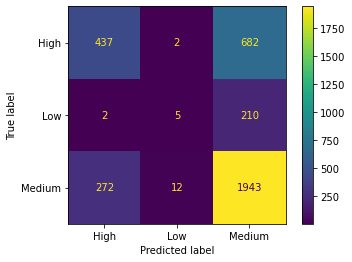

The Kappa of your model is: 0.25


In [1640]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(ytest, predictions))
print(confusion_matrix(ytest, predictions))
plot_confusion_matrix(classification, xtest, ytest)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(ytest, predictions)))

In [1641]:
df.to_csv("/Users/kb/Ironhack/Labs/Money-Ball-Project/Data/final_fifa_dataset.csv", index = False)